### Lending Club

Project Goals:
1. At loan origination: is my model able to predict if a customer will fully pay off their debt or will they incur a charge off
2. Multiclassification exercise: the objective of the second part is to get experience with multiclassification.

The fully dataset can be found on kaggle at: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. At its height, LendingClub was the world's largest peer-to-peer lending platform. The company claims that $15.98 billion in loans had been originated through its platform up to December 31, 2015

LendingClub enabled borrowers to create unsecured personal loans between \\$1,000 and \\$40,000. The standard loan period was three years. Investors were able to search and browse the loan listings on LendingClub website and select loans that they wanted to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors made money from the interest on these loans. LendingClub made money by charging borrowers an origination fee and investors a service fee.

LendingClub also makes traditional direct to consumer loans, including automobile refinance transactions, through WebBank, an FDIC-insured, state-chartered industrial bank that is headquartered in Salt Lake City Utah. The loans are not funded by investors but are assigned to other financial institutions.

### Introduction
In Part 1, I will perform feature selection from the raw data by exploring the feature either through Lending Club data dictionary or from resources online.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/accepted_2007_to_2018Q4.csv')

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Create a feat_info function that returns the description of said feature passed into the function

In [3]:
data_info = pd.read_csv('./DATA/Lending Club Data Dictionary Approved.csv',index_col='LoanStatNew', encoding = "ISO-8859-1")

In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('hardship_payoff_balance_amount')

The payoff balance amount as of the hardship plan start date


This is a popular dataset on Kaggle. We will use the feature set listed below as our starting feature set and add additional features that might be important in building our model


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [6]:
feat_list = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
             'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
             'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
             'application_type', 'mort_acc', 'pub_rec_bankruptcies']

In [7]:
df.columns[:20]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc'],
      dtype='object')

In [8]:
df[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc']].head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade                    emp_title  \
0     13.99       123.03     C        C4                      leadman   
1     11.99       820.28     C        C1                     Engineer   
2     10.78       432.66     B        B4                 truck driver   
3     14.85       829.90     C        C5  Information Systems Officer   
4     22.45       289.91     F        F1          Contract Specialist   

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0  10+ years       MORTGAGE     55000.0        Not Verified  Dec-2015   
1  10+ years       MORTGAGE     65000.0        Not Verified  Dec-2015   
2  10+ years       MORTGAGE     63000.0        Not Verified  Dec-2015   
3  10+ years       MORTGAGE    110000.0     Source Verified  Dec-2015   
4    3 years       MORTGAGE    104433.0     Source Verified  Dec-2015   

  loan_status pymnt_plan                                                url  \
0  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
1  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
2  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
3     Current          n  https://lendingclub.com/browse/loanDetail.acti...   
4  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   

  desc  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [9]:
feat_info('funded_amnt')

The total amount committed to that loan at that point in time.


In [10]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [11]:
df[df['loan_amnt'] > df['funded_amnt']]['loan_status'].value_counts()

Fully Paid                                             1579
Charged Off                                             342
Does not meet the credit policy. Status:Fully Paid       97
Does not meet the credit policy. Status:Charged Off      44
Current                                                   3
Name: loan_status, dtype: int64

In [12]:
'funded_amnt' in feat_list

False

We will ignore 'funded_amt' since the number of loan_amnt being greater than funded_amnt is around 2,000 which is less than 1 % of the total dataset

In [13]:
feat_info('funded_amnt_inv')

The total amount committed by investors for that loan at that point in time.


In [14]:
df[df['loan_amnt'] > df['funded_amnt_inv']]['loan_status'].value_counts()

Fully Paid                                             90623
Current                                                33165
Charged Off                                            23993
Does not meet the credit policy. Status:Fully Paid      1531
Late (31-120 days)                                       957
Does not meet the credit policy. Status:Charged Off      609
In Grace Period                                          422
Late (16-30 days)                                        201
Name: loan_status, dtype: int64

We will include 'funded_amnt_inv' into our feature set as there seem to be a distribution between Fully Paid and Charged Off

In [15]:
feat_list.append('funded_amnt_inv')

In [16]:
'pymnt_plan' in feat_list

False

In [17]:
feat_info('pymnt_plan')

Indicates if a payment plan has been put in place for the loan


In [18]:
df[['pymnt_plan', 'loan_status']]

pymnt_plan  loan_status
0                n   Fully Paid
1                n   Fully Paid
2                n   Fully Paid
3                n      Current
4                n   Fully Paid
...            ...          ...
2260696          n      Current
2260697          n  Charged Off
2260698          n      Current
2260699        NaN          NaN
2260700        NaN          NaN

[2260701 rows x 2 columns]

In [19]:
df['pymnt_plan'].unique()

array(['n', 'y', nan], dtype=object)

In [20]:
df[df['pymnt_plan'] == 'y']['loan_status'].unique()

array(['Late (31-120 days)', 'Current', 'Late (16-30 days)'], dtype=object)

In [21]:
df[df['pymnt_plan'] == 'n']['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [22]:
len(df[df['pymnt_plan'] == 'n']['loan_status'])

2260048

we will not include 'pymnt_plan' since having a payment plan involves only current or late loans while not having a payment plan involves the majority of rows. A split between a 'y' and 'n' may not give good separation in loan_status attributes

In [23]:
feat_info('url')

URL for the LC page with listing data.


In [24]:
df['url']

0          https://lendingclub.com/browse/loanDetail.acti...
1          https://lendingclub.com/browse/loanDetail.acti...
2          https://lendingclub.com/browse/loanDetail.acti...
3          https://lendingclub.com/browse/loanDetail.acti...
4          https://lendingclub.com/browse/loanDetail.acti...
                                 ...                        
2260696    https://lendingclub.com/browse/loanDetail.acti...
2260697    https://lendingclub.com/browse/loanDetail.acti...
2260698    https://lendingclub.com/browse/loanDetail.acti...
2260699                                                  NaN
2260700                                                  NaN
Name: url, Length: 2260701, dtype: object

In [25]:
feat_info('desc')

Loan description provided by the borrower


In [26]:
len(df[df['desc'].notnull()])

126067

Since only about 5 % of the rows have a desc, we will not include it in our feature list

In [27]:
df.columns[20:40]

Index(['purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv'],
      dtype='object')

In [28]:
for i in ['purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv']:
    if not (i in feat_list):
        print(i)

delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
out_prncp
out_prncp_inv


In [29]:
feat_info('delinq_2yrs')

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


In [30]:
df[df['delinq_2yrs'] > 0]['loan_status'].value_counts()

Fully Paid                                             203637
Current                                                154383
Charged Off                                             55614
Late (31-120 days)                                       4535
In Grace Period                                          1947
Late (16-30 days)                                         992
Does not meet the credit policy. Status:Fully Paid        299
Does not meet the credit policy. Status:Charged Off       116
Default                                                     8
Name: loan_status, dtype: int64

In [31]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

delinq_2yrs > 0 consist of a significant number of Charged Off labels. We will include this in our feature set.

In [32]:
feat_list.append('delinq_2yrs')

In [33]:
feat_info('fico_range_low')

The lower boundary range the borrowers FICO at loan origination belongs to.


In [34]:
feat_info('fico_range_high')

The upper boundary range the borrowers FICO at loan origination belongs to.


In [35]:
df['fico_range_low']

0          675.0
1          715.0
2          695.0
3          785.0
4          695.0
           ...  
2260696    705.0
2260697    660.0
2260698    660.0
2260699      NaN
2260700      NaN
Name: fico_range_low, Length: 2260701, dtype: float64

In [36]:
df['fico_range_high']

0          679.0
1          719.0
2          699.0
3          789.0
4          699.0
           ...  
2260696    709.0
2260697    664.0
2260698    664.0
2260699      NaN
2260700      NaN
Name: fico_range_high, Length: 2260701, dtype: float64

In [37]:
df['fico_range_low'].isnull().sum()

33

In [38]:
df['fico_range_high'].isnull().sum()

33

We will add both fico range low and high to the feat_list and perform feature engineering on it later.

In [39]:
feat_list.append('fico_range_low')

In [40]:
feat_list.append('fico_range_high')

In [41]:
feat_info('inq_last_6mths')

The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


In [42]:
df['inq_last_6mths'].unique()

array([ 1.,  4.,  0.,  3.,  2.,  5.,  6., nan,  7.,  8.,  9., 10., 11.,
       12., 15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25.,
       27., 20., 19.])

In [43]:
feat_info('mths_since_last_delinq')

The number of months since the borrower's last delinquency.


In [44]:
feat_info('mths_since_last_record')

The number of months since the last public record.


In [45]:
feat_info('out_prncp')

Remaining outstanding principal for total amount funded


In [46]:
feat_info('out_prncp_inv')

Remaining outstanding principal for portion of total amount funded by investors


In [47]:
df['mths_since_last_delinq'].unique()

array([ 30.,   6.,  nan,  12.,  49.,   3.,  75.,  54.,  42.,  29.,  33.,
        15.,  18.,  47.,  35.,  23.,  38.,   8.,  70.,  59.,  45.,  52.,
        66.,  50.,  46.,  39.,  63.,  61.,  78.,  74.,  19.,  34.,   9.,
        27.,  26.,  68.,  73.,  36.,  31.,  32.,  13.,  16.,  37.,  17.,
        24.,  55.,   1.,  69.,   4.,  57.,   7.,  21.,  40.,  41.,  11.,
        81.,  82.,  14.,  64.,  48.,   5.,  22.,   2.,  44.,  10.,  60.,
        51.,  53.,  25.,  20.,  43.,  62.,  65.,  72.,  56.,   0.,  28.,
        71.,  79.,  58.,  67.,  76.,  80.,  95.,  85.,  94.,  77.,  83.,
       116.,  89., 103.,  99., 113., 109.,  92.,  84., 101.,  88., 119.,
       120.,  98.,  96.,  90.,  86., 106.,  87., 115., 108., 152., 100.,
        91., 105., 134., 146.,  97.,  93., 123., 131., 157., 122., 104.,
       112., 154., 121., 127., 170., 171., 110., 142., 125., 118., 102.,
       129., 114., 117., 149., 133., 176., 111., 137., 107., 130., 160.,
       138., 126., 226., 156., 158., 128., 132., 17

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '29.0'),
  Text(30, 0, '30.0'),
  Text(31, 0, '31.0'),
  Text(32, 0, '32.0'),
  Text(33, 0, '33.0'),
  Text(34, 0

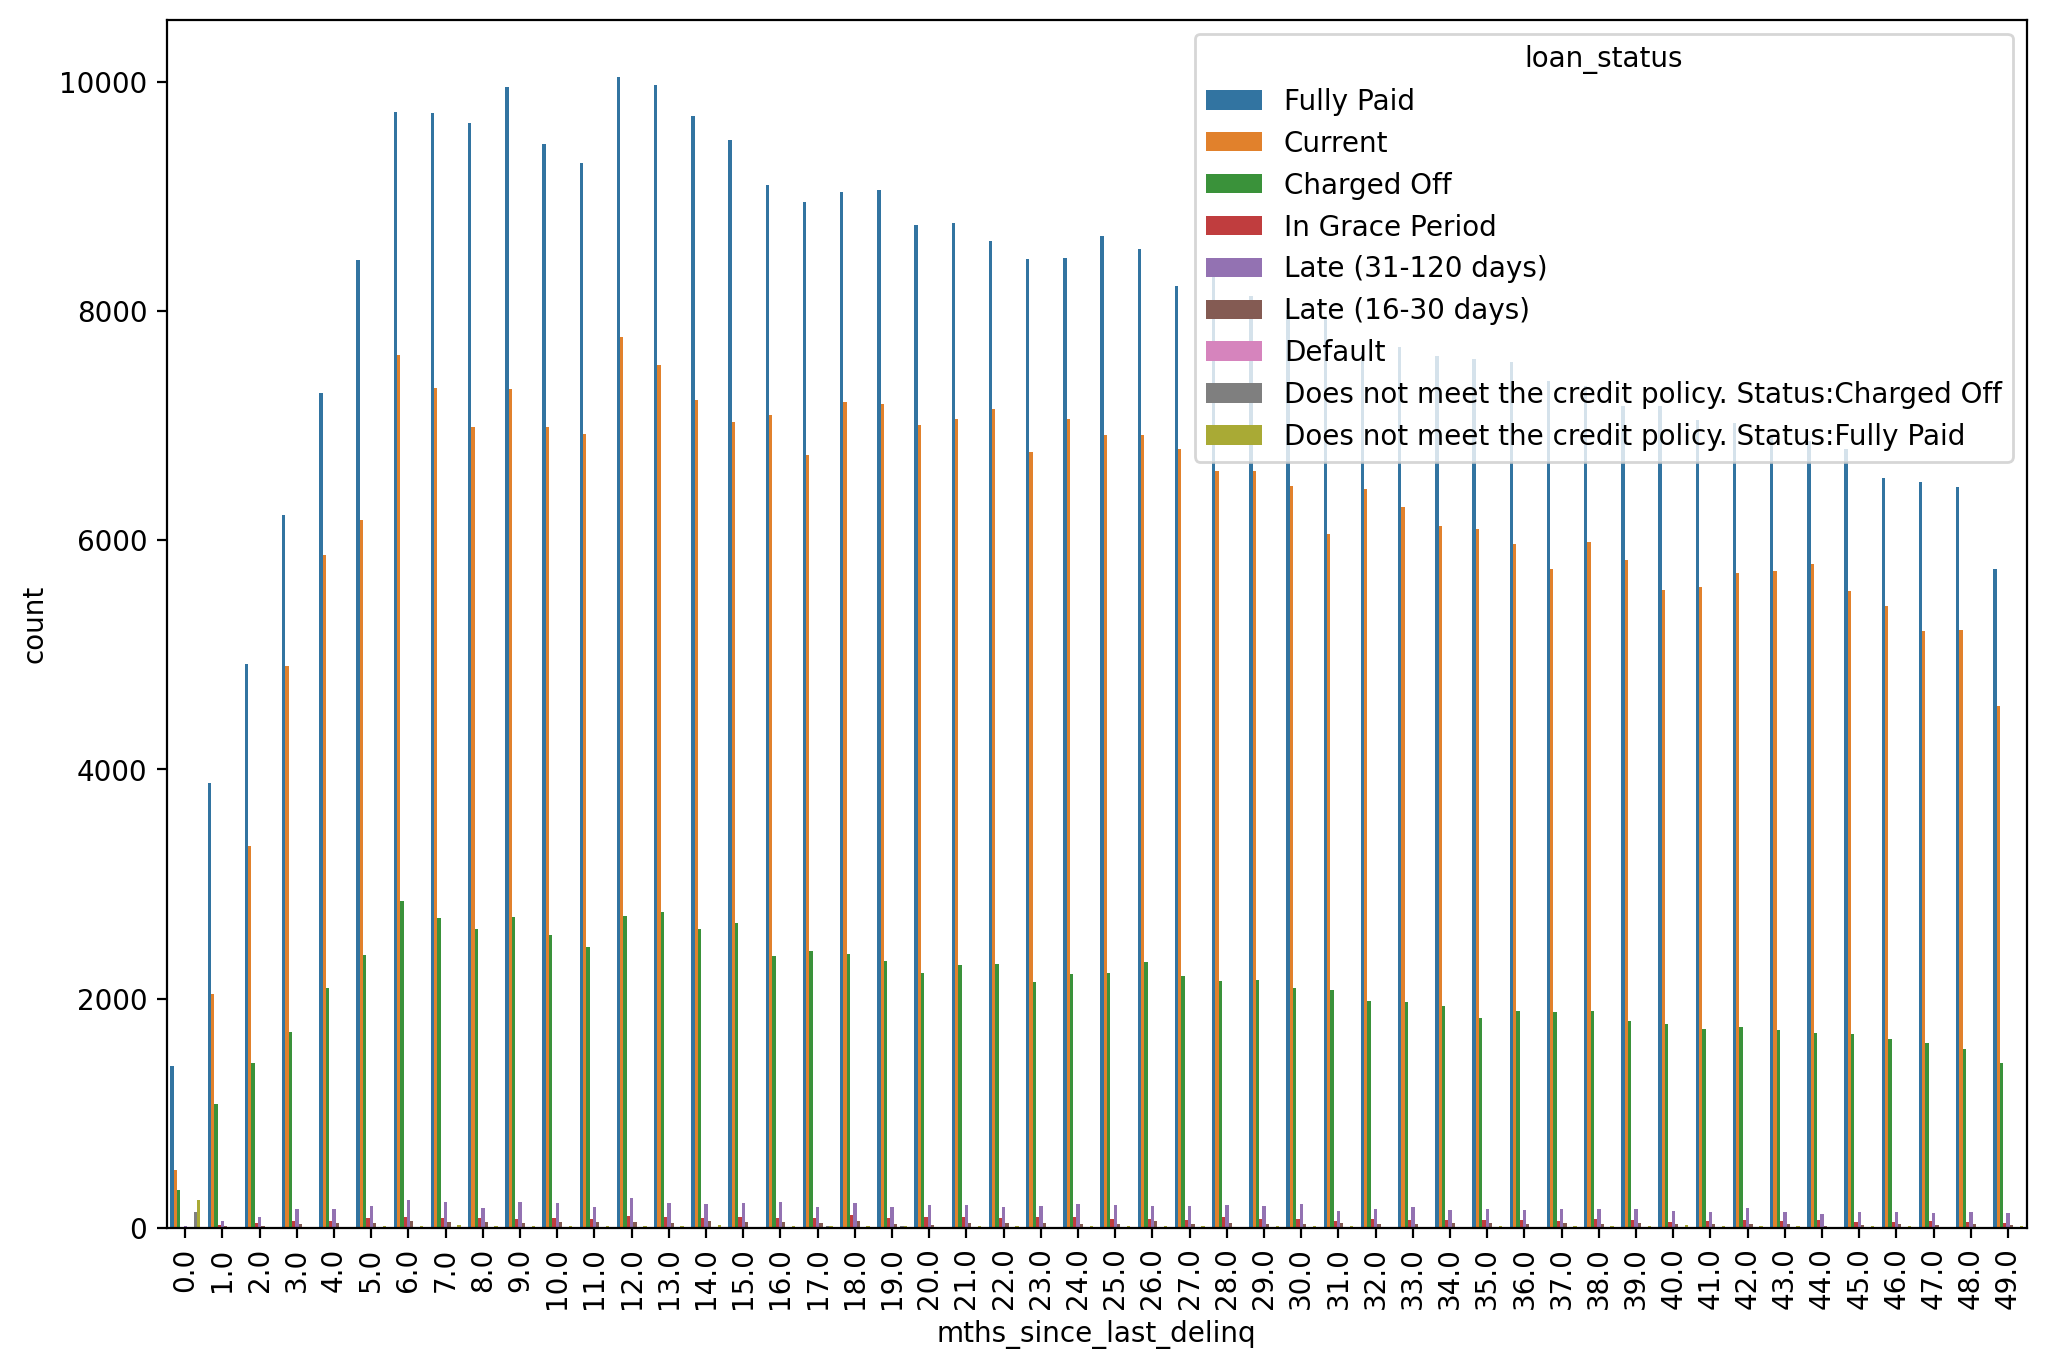

In [48]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df[df['mths_since_last_delinq'] <50], x='mths_since_last_delinq', hue='loan_status')
plt.xticks(rotation=90)

We will not include 
inq_last_6mths,
 mths_since_last_delinq,
 mths_since_last_record,
 out_prncp,
 out_prncp_inv,
in our feature set as we feel that the feature set contains similar information

In [49]:
df.columns[40:60]

Index(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint'],
      dtype='object')

In [50]:
for i in ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint']:
    if not (i in feat_list):
        print(i)

total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
annual_inc_joint
dti_joint
verification_status_joint


In [51]:
feat_info('total_pymnt')

Payments received to date for total amount funded


In [52]:
feat_info('total_pymnt_inv')

Payments received to date for portion of total amount funded by investors


In [53]:
df['total_pymnt'].isnull().sum()

33

In [54]:
df['total_pymnt_inv'].isnull().sum()

33

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

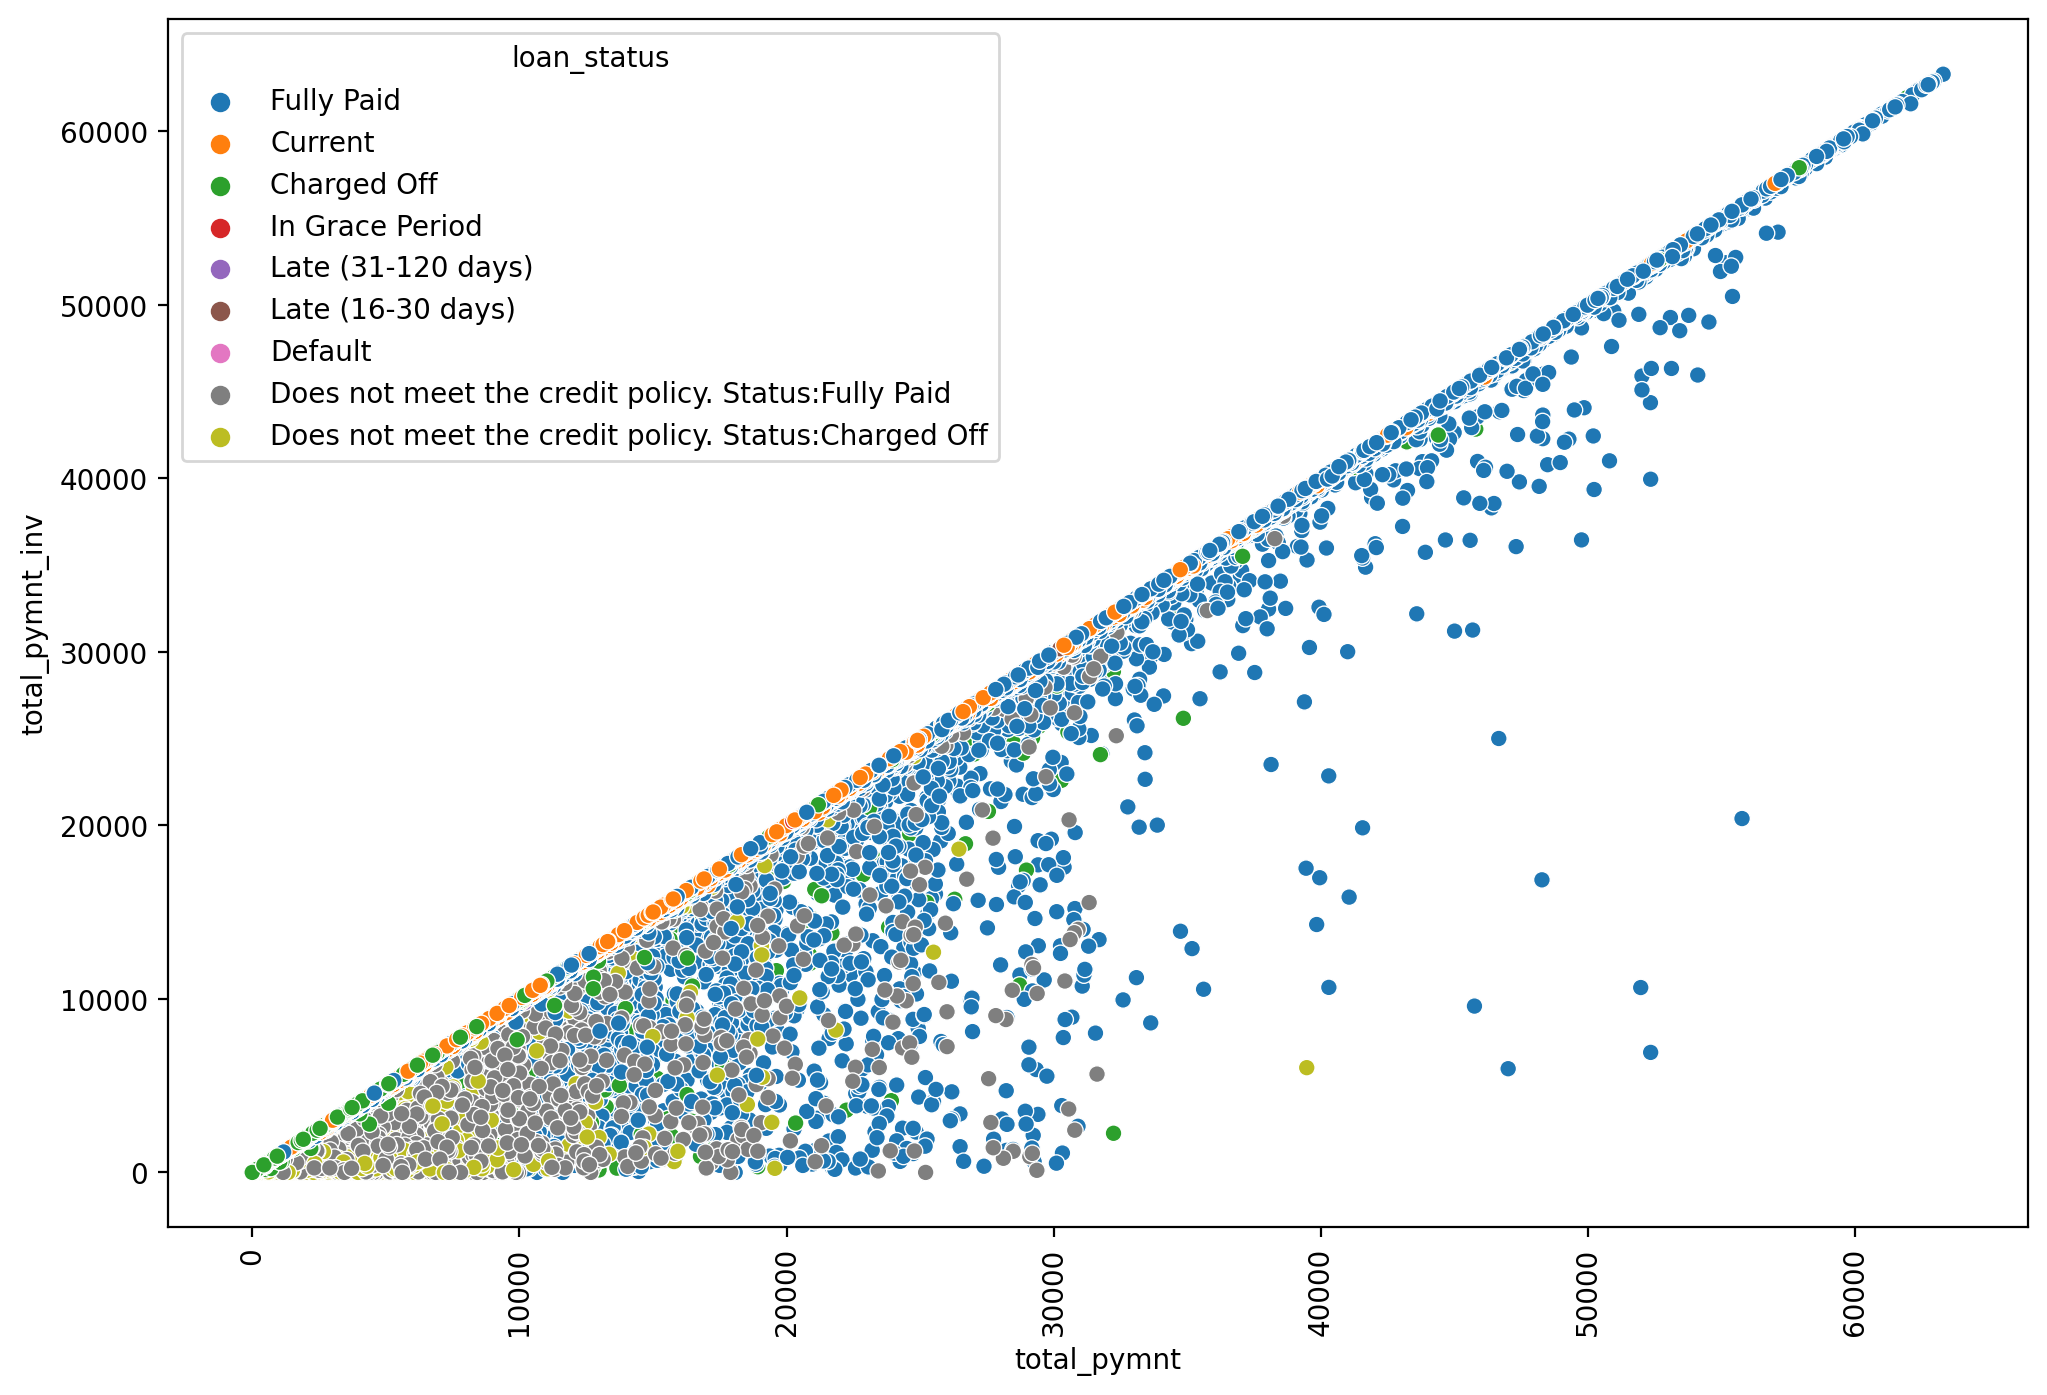

In [55]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='total_pymnt', y ='total_pymnt_inv', hue='loan_status')
plt.xticks(rotation=90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

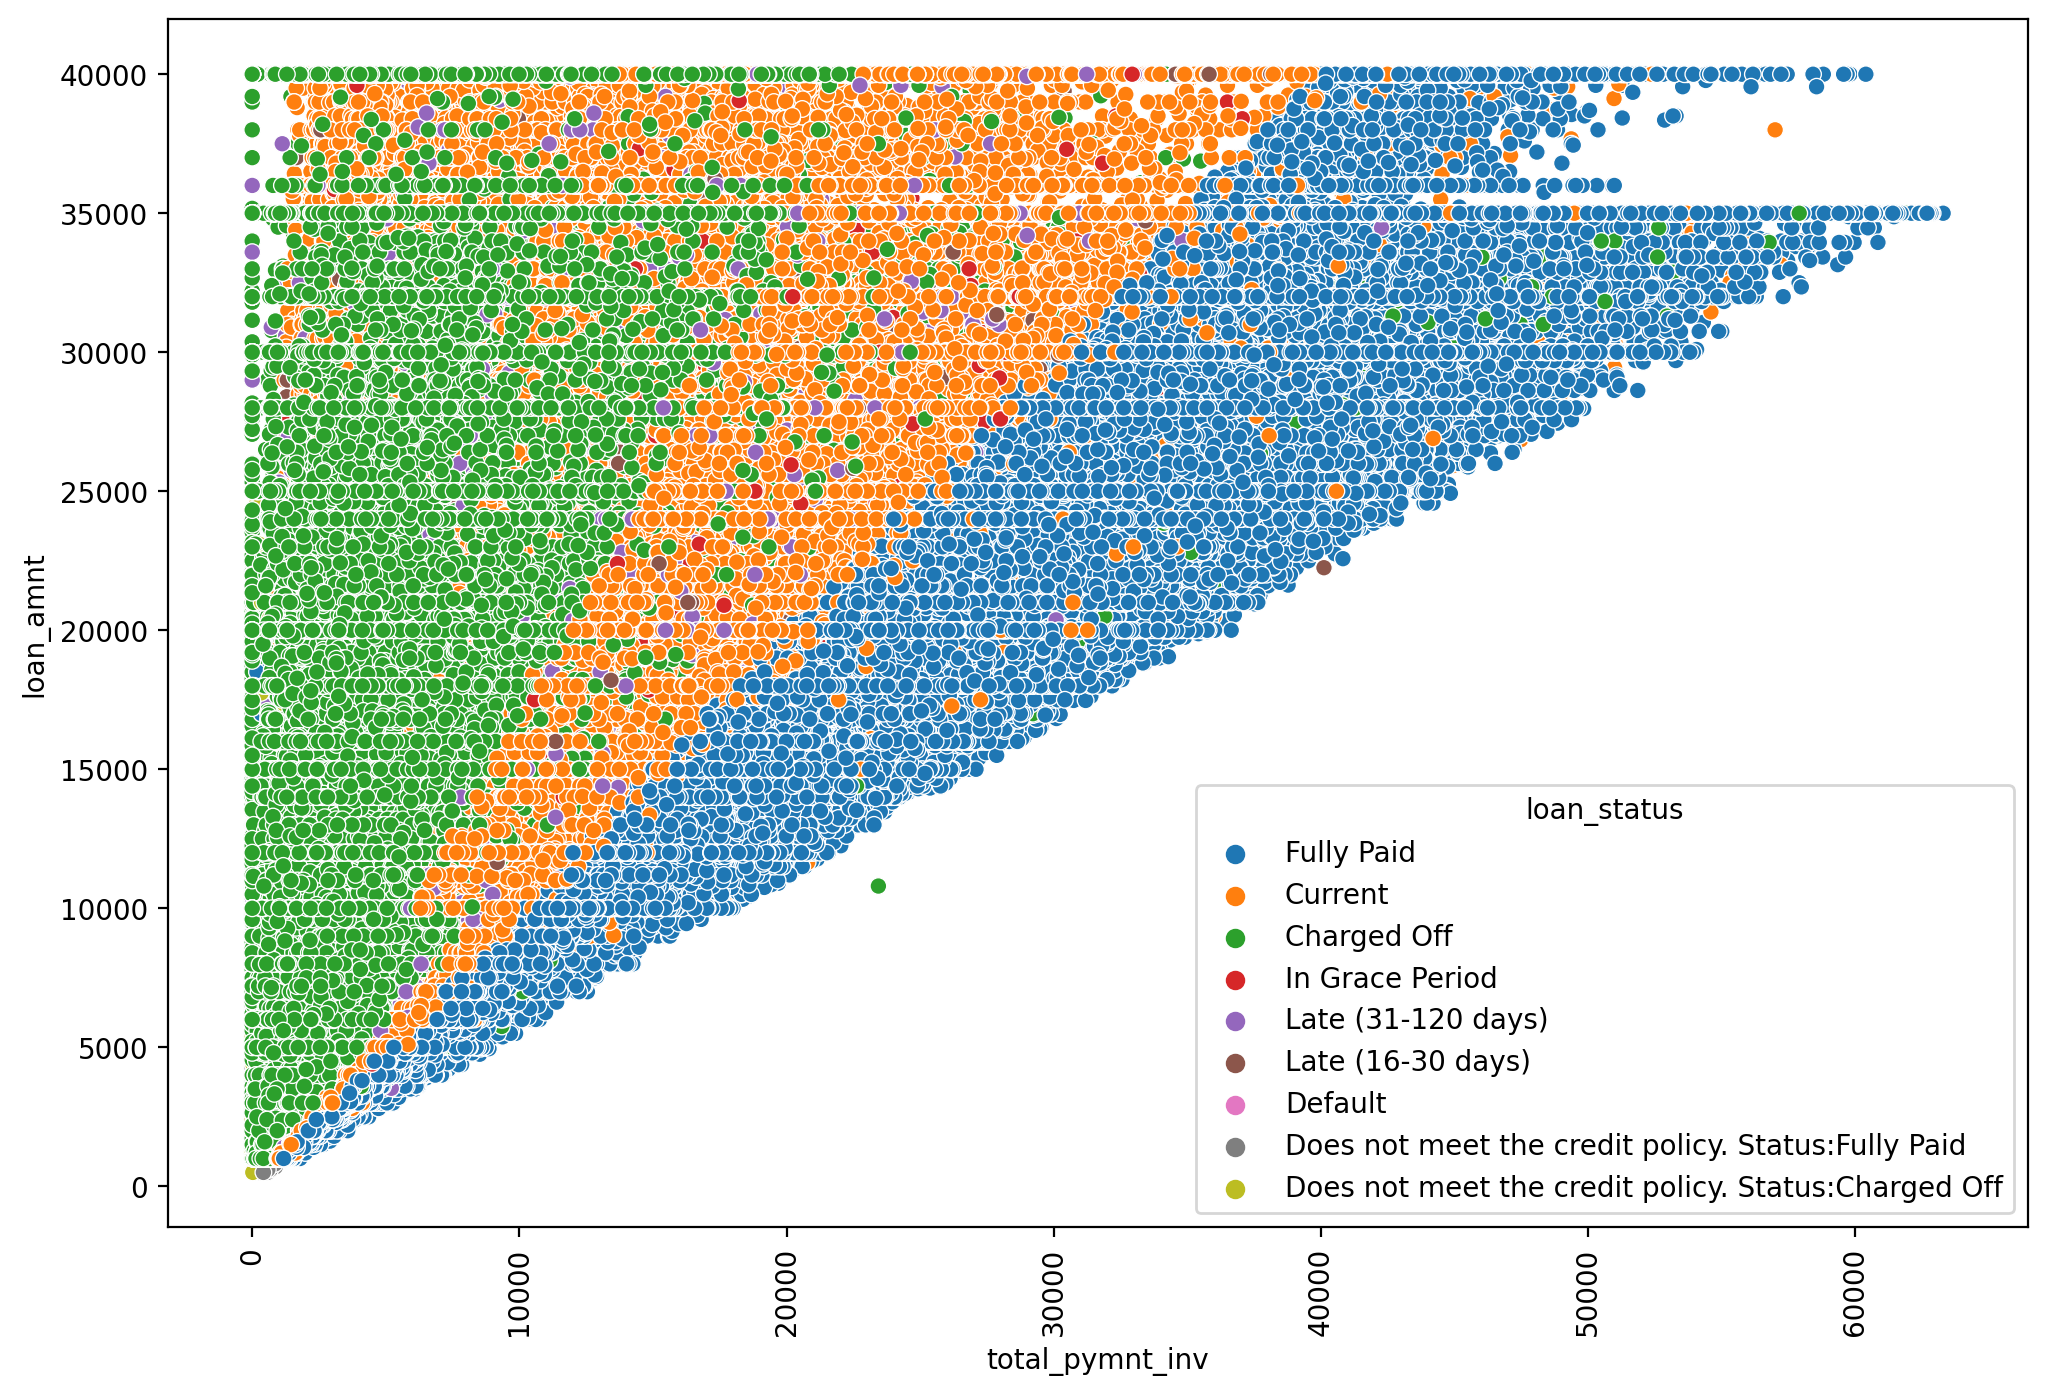

In [56]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='total_pymnt_inv', y ='loan_amnt', hue='loan_status')
plt.xticks(rotation=90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

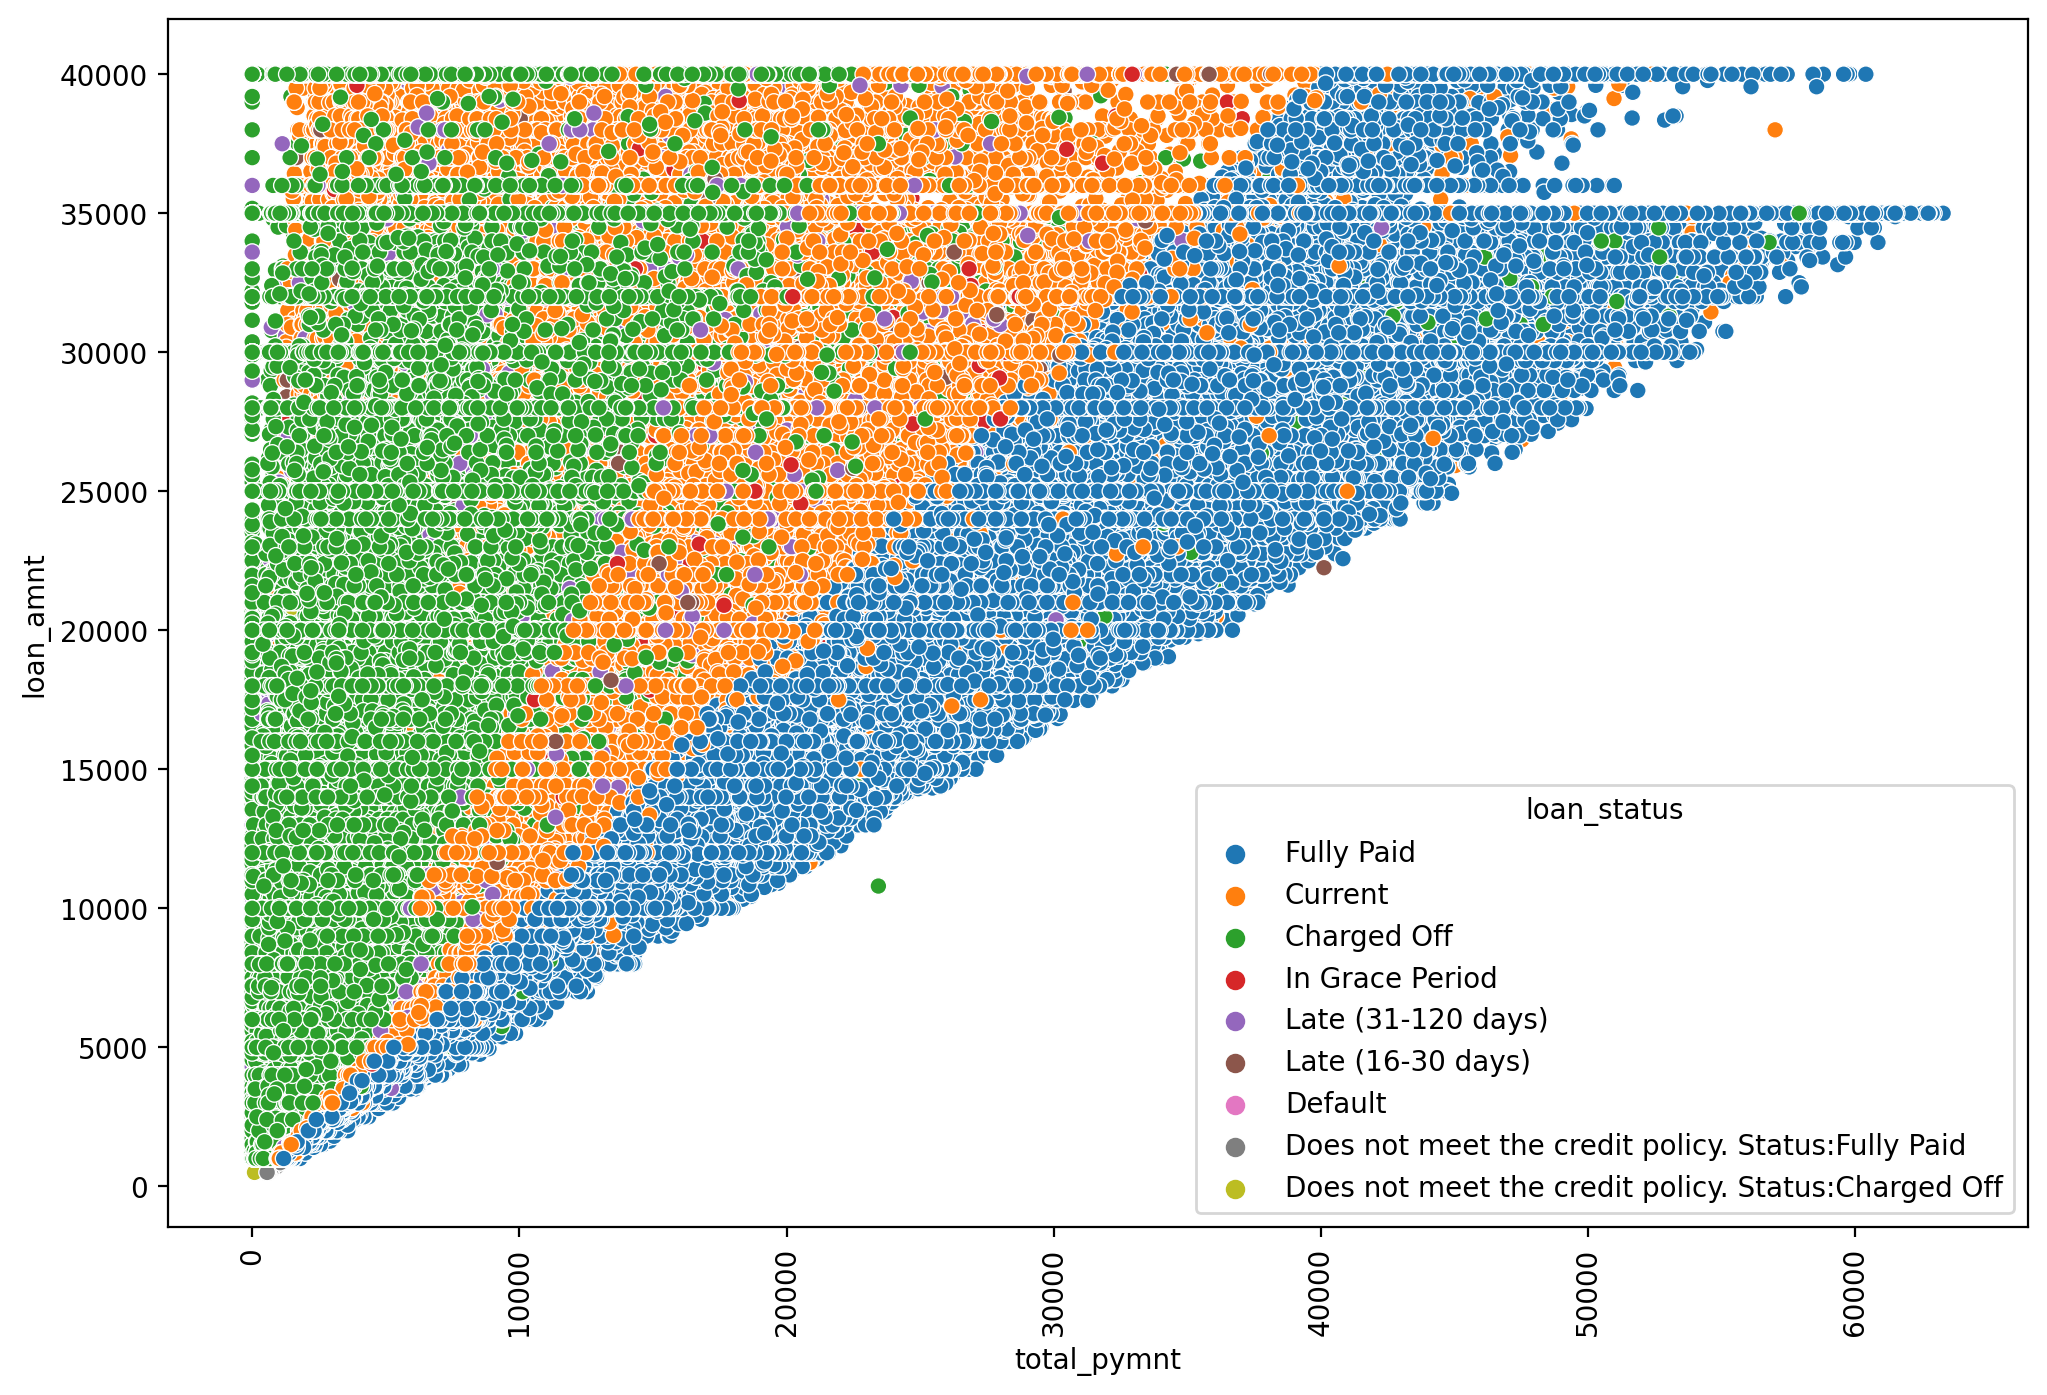

In [57]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='total_pymnt', y ='loan_amnt', hue='loan_status')
plt.xticks(rotation=90)

In [58]:
df[['total_pymnt', 'total_pymnt_inv']]

total_pymnt  total_pymnt_inv
0         4421.723917          4421.72
1        25679.660000         25679.66
2        22705.924294         22705.92
3        31464.010000         31464.01
4        11740.500000         11740.50
...               ...              ...
2260696  24903.930000         24903.93
2260697   6755.400000          6755.40
2260698   9621.250000          9621.25
2260699           NaN              NaN
2260700           NaN              NaN

[2260701 rows x 2 columns]

Both total_pymnt and total_pymnt_inv show extremely similar relationship w.r.t. loan_amnt and loan status, we will keep one of them in our feature set

In [59]:
feat_list.append('total_pymnt')

In [60]:
feat_info('total_rec_prncp')

Principal received to date


In [61]:
feat_info('total_rec_int')

Interest received to date


In [62]:
feat_info('total_rec_late_fee')

Late fees received to date


In [63]:
feat_info('recoveries')

post charge off gross recovery


In [64]:
feat_info('collection_recovery_fee')

post charge off collection fee


In [65]:
feat_info('last_pymnt_d')

Last month payment was received


In [66]:
feat_info('last_pymnt_amnt')

Last total payment amount received


In [67]:
feat_info('next_pymnt_d')

Next scheduled payment date


In [68]:
feat_info('last_credit_pull_d')

The most recent month LC pulled credit for this loan


In [69]:
feat_info('last_fico_range_high')

The upper boundary range the borrowers last FICO pulled belongs to.


In [70]:
feat_info('fico_range_high')

The upper boundary range the borrowers FICO at loan origination belongs to.


In [71]:
df[df['fico_range_high'] != df['last_fico_range_high']][['fico_range_high', 'last_fico_range_high']]

fico_range_high  last_fico_range_high
0                  679.0                 564.0
1                  719.0                 699.0
2                  699.0                 704.0
3                  789.0                 679.0
4                  699.0                 704.0
...                  ...                   ...
2260696            709.0                 724.0
2260697            664.0                 594.0
2260698            664.0                 669.0
2260699              NaN                   NaN
2260700              NaN                   NaN

[2145195 rows x 2 columns]

(array([600., 650., 700., 750., 800., 850., 900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


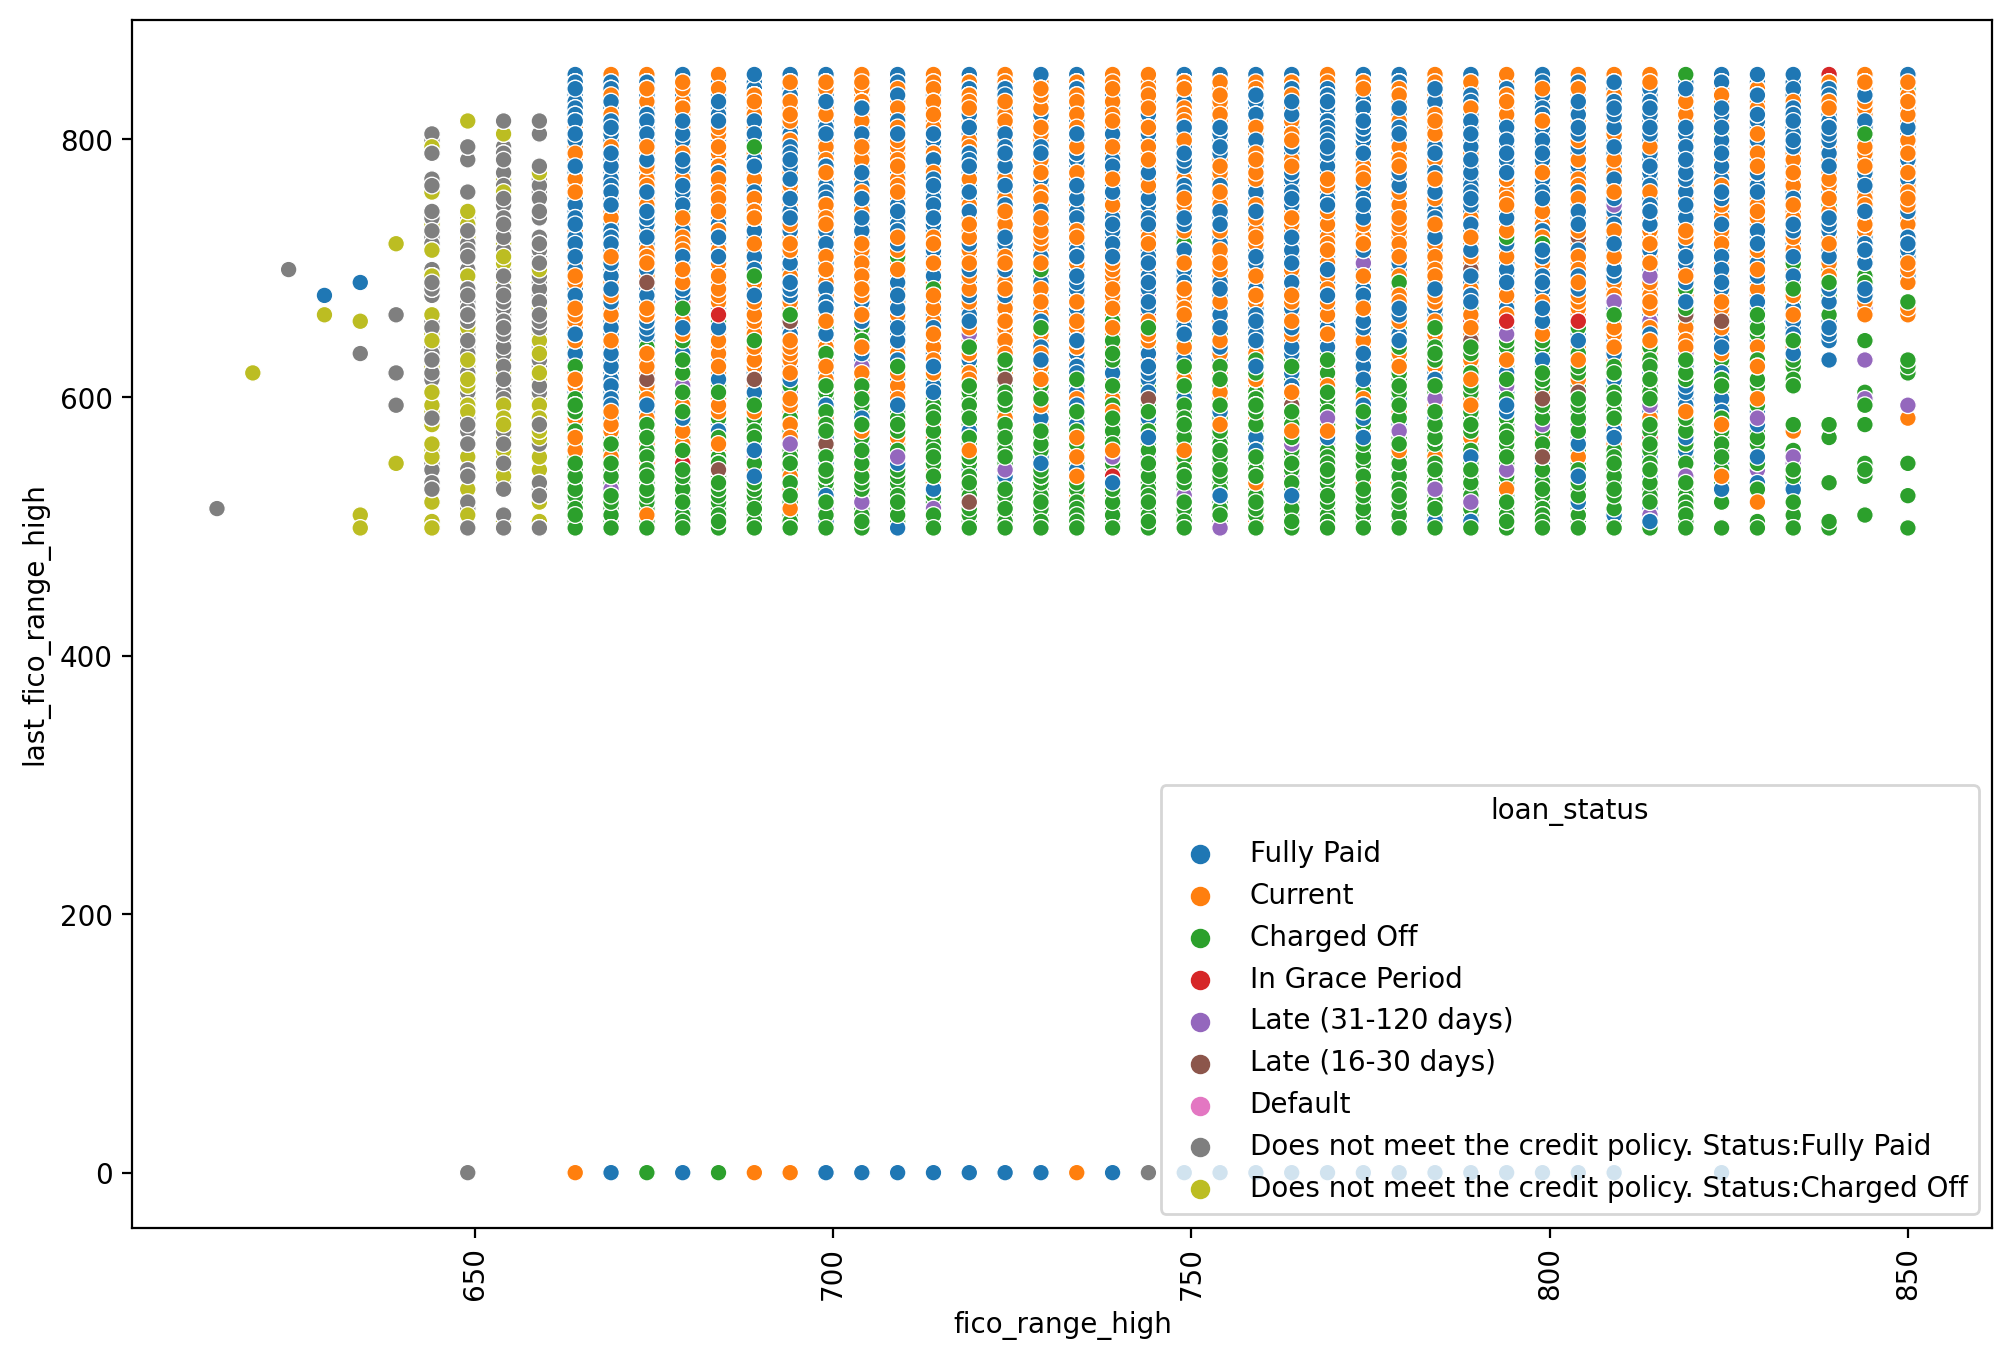

In [72]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='fico_range_high', y ='last_fico_range_high', hue='loan_status')
plt.xticks(rotation=90)

It looks like whenever there is a fico score drop from loan origination to latest fico score pulled, there is a high likelihood that the loan will be charged off

In [73]:
feat_list.append('last_fico_range_high')

In [74]:
feat_list.append('last_fico_range_low')

In [75]:
feat_info('collections_12_mths_ex_med')

Number of collections in 12 months excluding medical collections


In [76]:
feat_info('mths_since_last_major_derog')

Months since most recent 90-day or worse rating


In [77]:
feat_info('policy_code')

publicly available policy_code=1
new products not publicly available policy_code=2


In [78]:
feat_info('annual_inc_joint')

The combined self-reported annual income provided by the co-borrowers during registration


In [79]:
feat_info('dti_joint')

A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income


In [80]:
# feat_info('verification_status_joint') 

In [81]:
df['verification_status_joint'].isnull().sum()

2144971

In [82]:
df['collections_12_mths_ex_med'].value_counts()

0.0     2223085
1.0       34684
2.0        2313
3.0         271
4.0          93
5.0          36
6.0          17
7.0           7
8.0           4
9.0           4
10.0          2
20.0          2
12.0          2
14.0          1
11.0          1
16.0          1
Name: collections_12_mths_ex_med, dtype: int64

In [83]:
df['mths_since_last_major_derog'].value_counts()

45.0     9181
43.0     9126
42.0     9096
44.0     9082
46.0     9042
         ... 
197.0       1
190.0       1
157.0       1
179.0       1
195.0       1
Name: mths_since_last_major_derog, Length: 183, dtype: int64

In [84]:
df['annual_inc_joint'].isnull().sum()

2139991

In [85]:
df['dti_joint'].isnull().sum()

2139995

Most of these features do not seem like good feature sets to predict charged off and fully paid loans

In [86]:
df.columns[60:80]

Index(['acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal'],
      dtype='object')

In [87]:
for i in ['acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal']:
    if not (i in feat_list):
        print(i)

acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal


In [88]:
feat_info('acc_now_delinq')

The number of accounts on which the borrower is now delinquent.


In [89]:
len(df['acc_now_delinq'].unique())

10

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '14.0')])

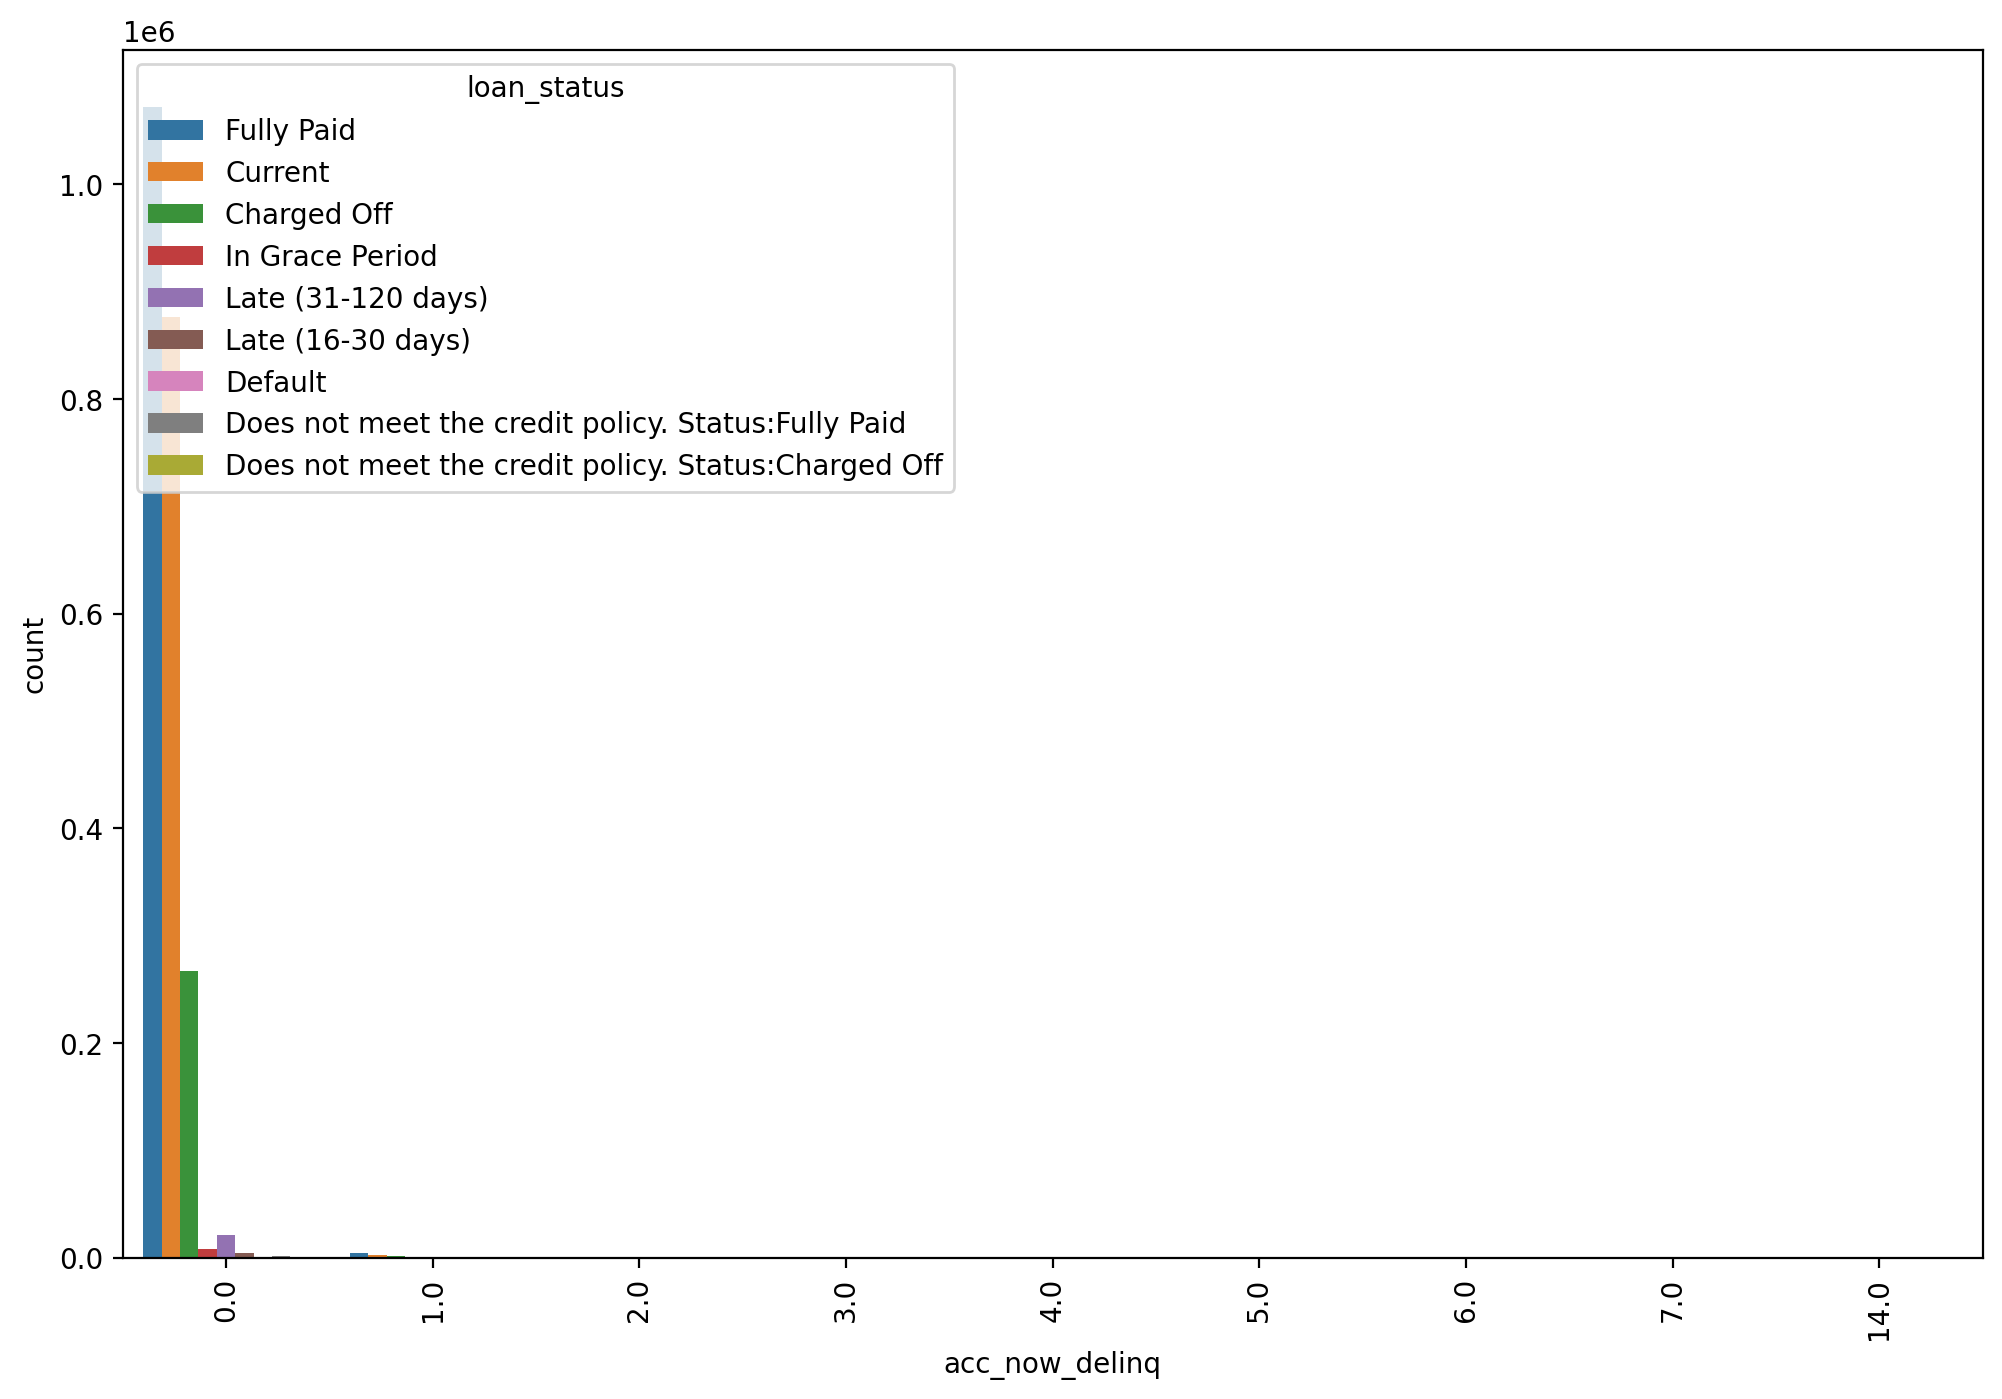

In [90]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='acc_now_delinq', hue='loan_status')
plt.xticks(rotation=90)

In [91]:
feat_info('tot_coll_amt')

Total collection amounts ever owed


<AxesSubplot:>

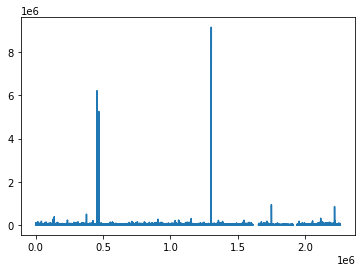

In [92]:
df['tot_coll_amt'].plot()

In [93]:
feat_info('tot_cur_bal')

Total current balance of all accounts


In [94]:
df['tot_cur_bal']

0          144904.0
1          204396.0
2          189699.0
3          301500.0
4          331730.0
             ...   
2260696     28398.0
2260697     62426.0
2260698    143066.0
2260699         NaN
2260700         NaN
Name: tot_cur_bal, Length: 2260701, dtype: float64

In [95]:
feat_info('open_acc_6m')

Number of open trades in last 6 months


In [96]:
feat_info('open_act_il')

Number of currently active installment trades


In [97]:
feat_info('open_il_12m')

Number of installment accounts opened in past 12 months


In [98]:
feat_info('open_il_24m')

Number of installment accounts opened in past 24 months


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '20.0'),
  Text(17, 0, '21.0'),
  Text(18, 0, '25.0')])

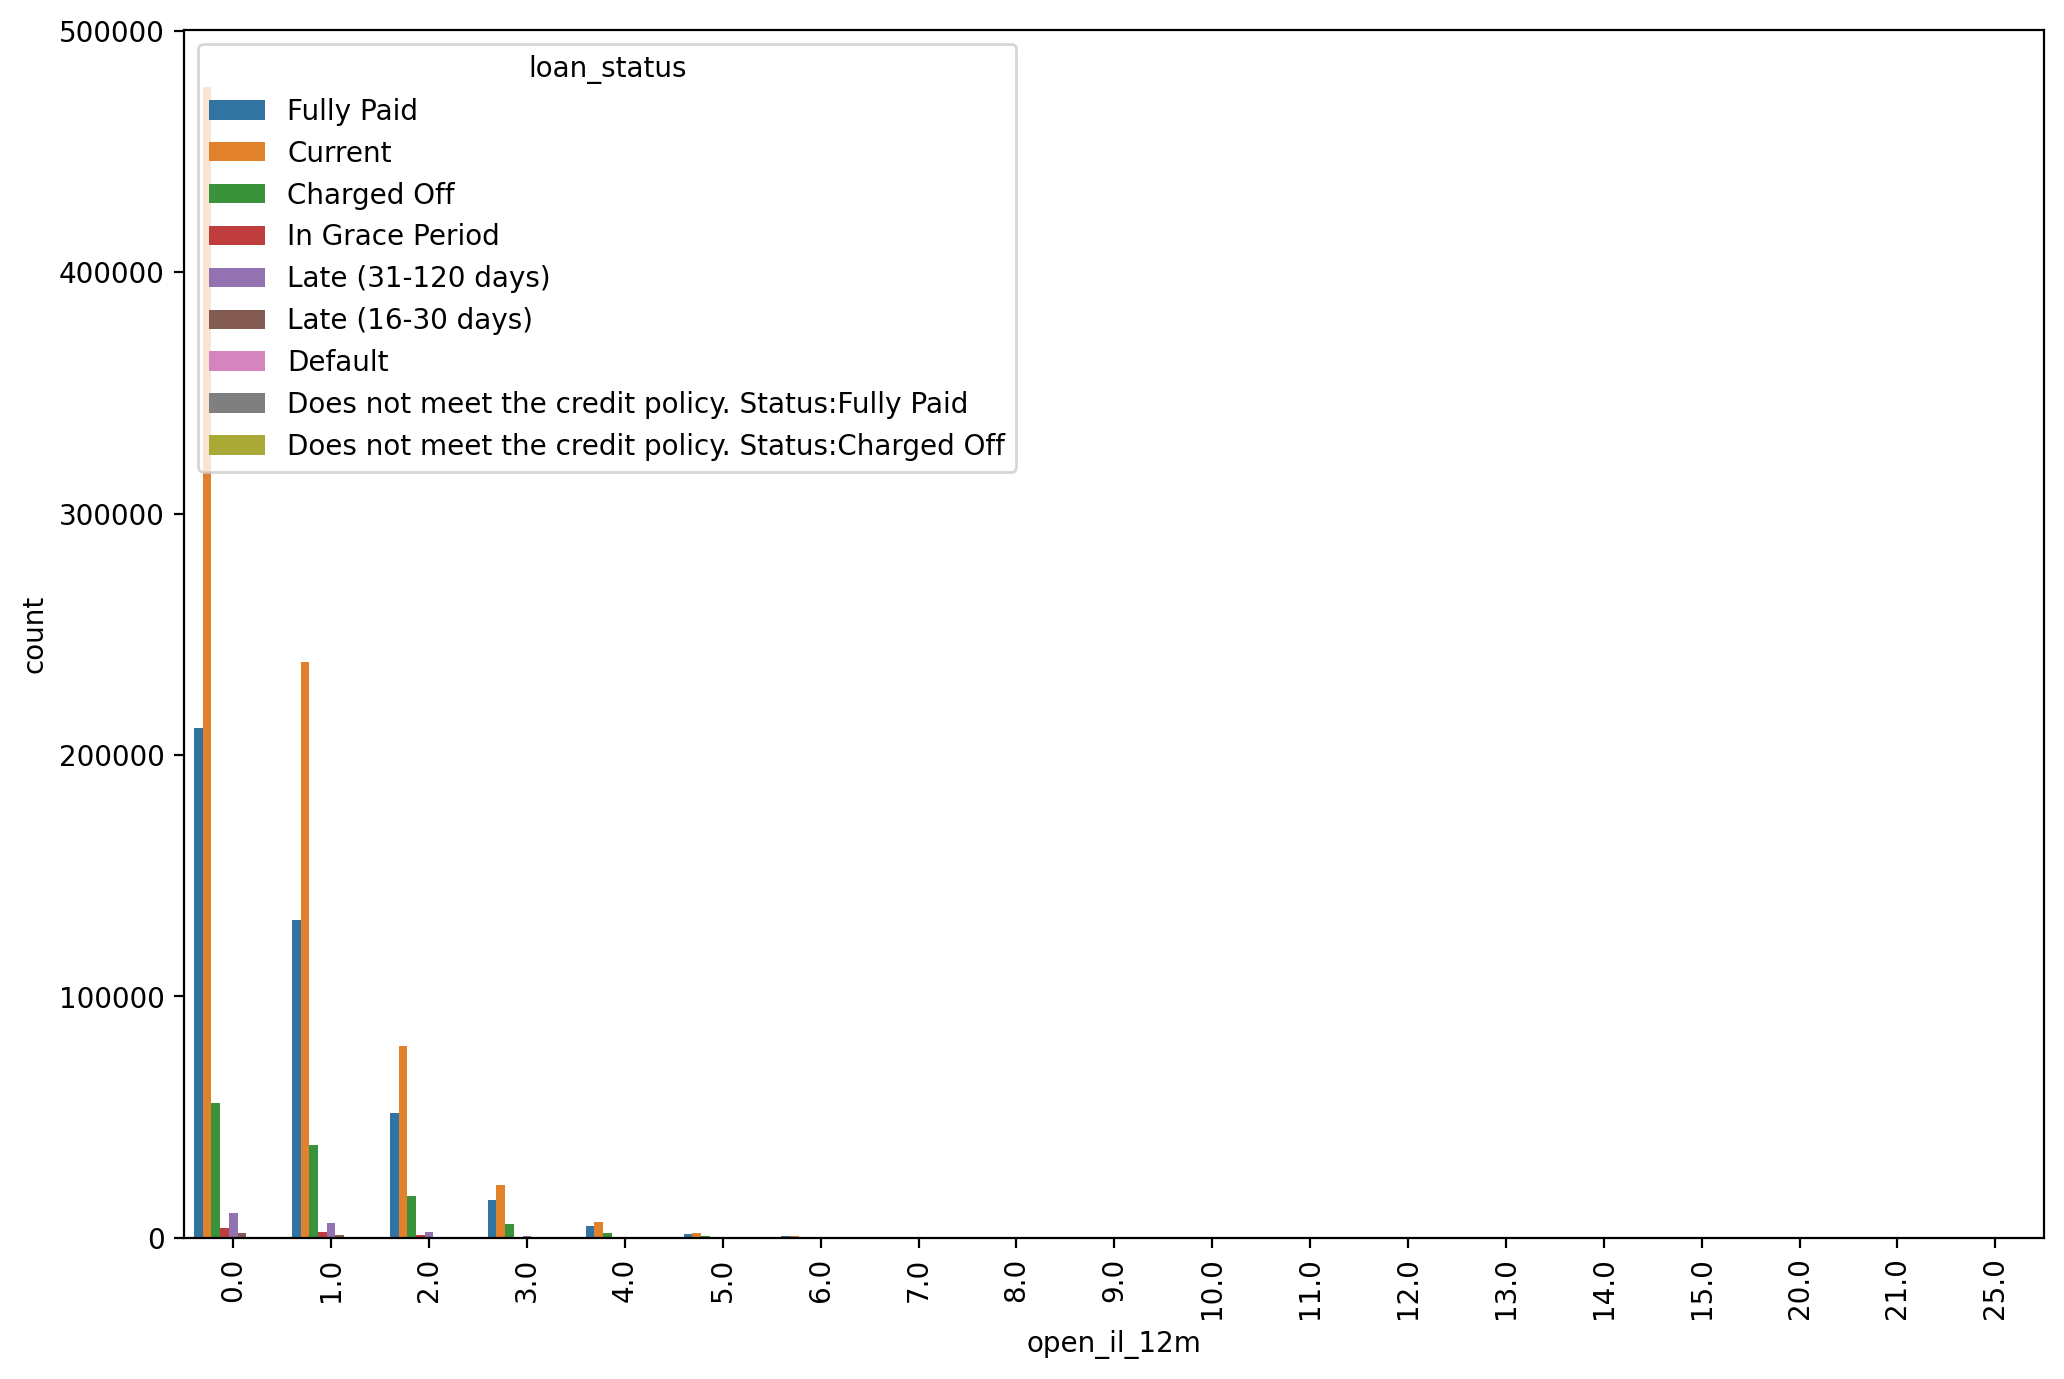

In [99]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='open_il_12m', hue='loan_status')
plt.xticks(rotation=90)

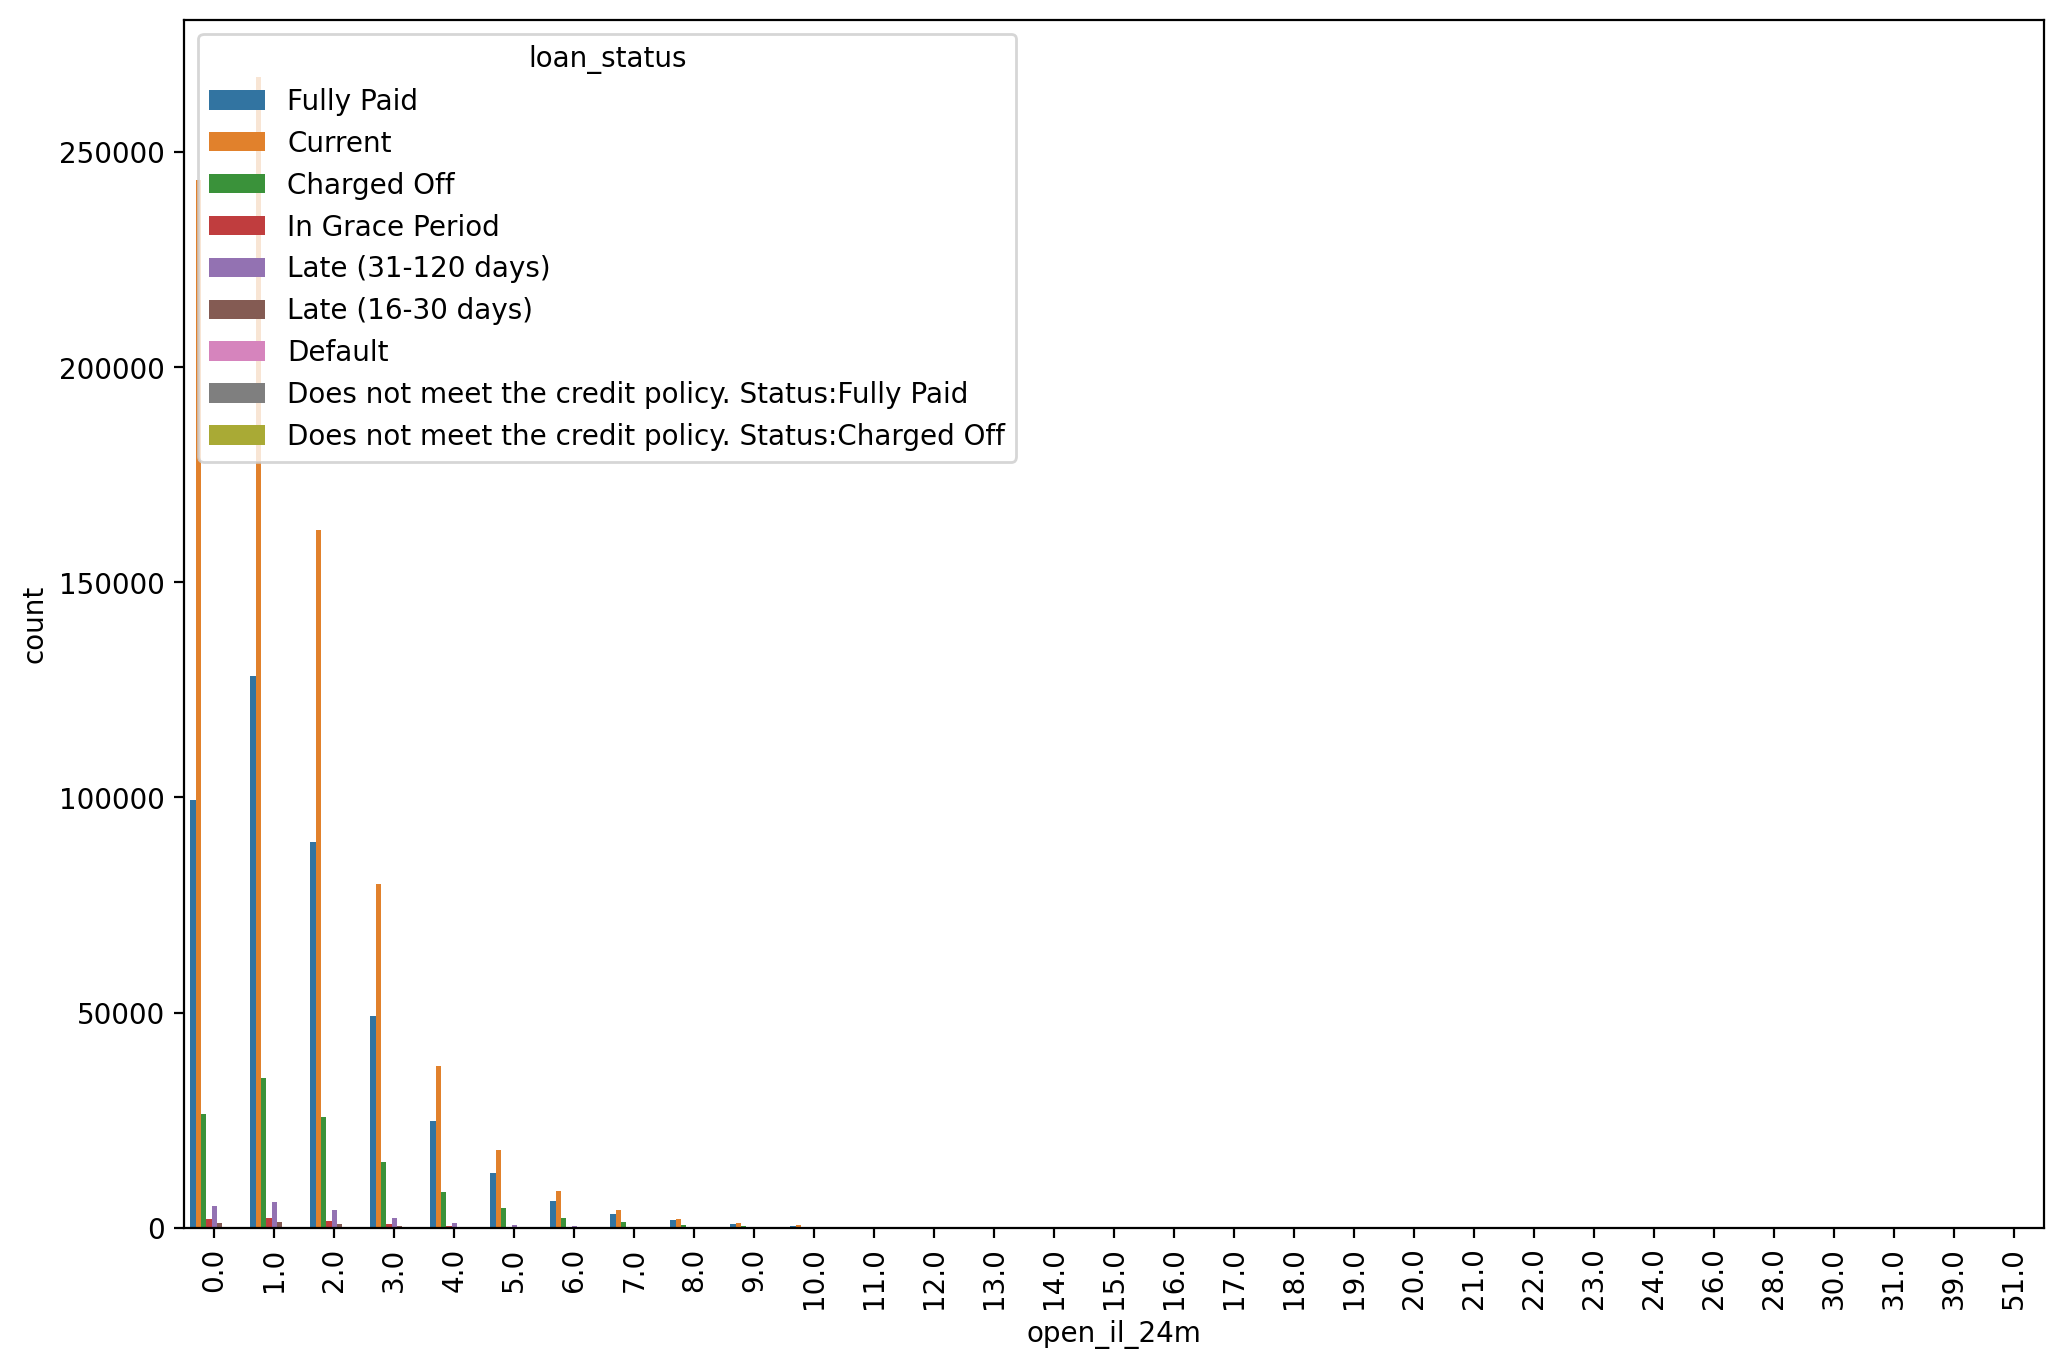

In [100]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='open_il_24m', hue='loan_status')
plt.xticks(rotation=90);

In [101]:
df['open_il_12m'].isnull().sum()

866162

In [102]:
df.groupby('loan_status').count()['open_il_12m']

loan_status
Charged Off                                            120098
Current                                                825343
Default                                                    38
Does not meet the credit policy. Status:Charged Off         0
Does not meet the credit policy. Status:Fully Paid          0
Fully Paid                                             417500
In Grace Period                                          7670
Late (16-30 days)                                        4007
Late (31-120 days)                                      19883
Name: open_il_12m, dtype: int64

In [103]:
df.groupby('loan_status').count()['open_il_24m']

loan_status
Charged Off                                            120098
Current                                                825343
Default                                                    38
Does not meet the credit policy. Status:Charged Off         0
Does not meet the credit policy. Status:Fully Paid          0
Fully Paid                                             417500
In Grace Period                                          7670
Late (16-30 days)                                        4007
Late (31-120 days)                                      19883
Name: open_il_24m, dtype: int64

We will include open_il_12m in our feature set as it shows some relationship with charged off

In [104]:
feat_list.append('open_il_12m')

In [105]:
feat_info('mths_since_rcnt_il')

Months since most recent installment accounts opened


In [106]:
feat_info('total_bal_il')

Total current balance of all installment accounts


In [107]:
feat_info('il_util')

Ratio of total current balance to high credit/credit limit on all install acct


In [108]:
feat_info('open_rv_12m')

Number of revolving trades opened in past 12 months


''

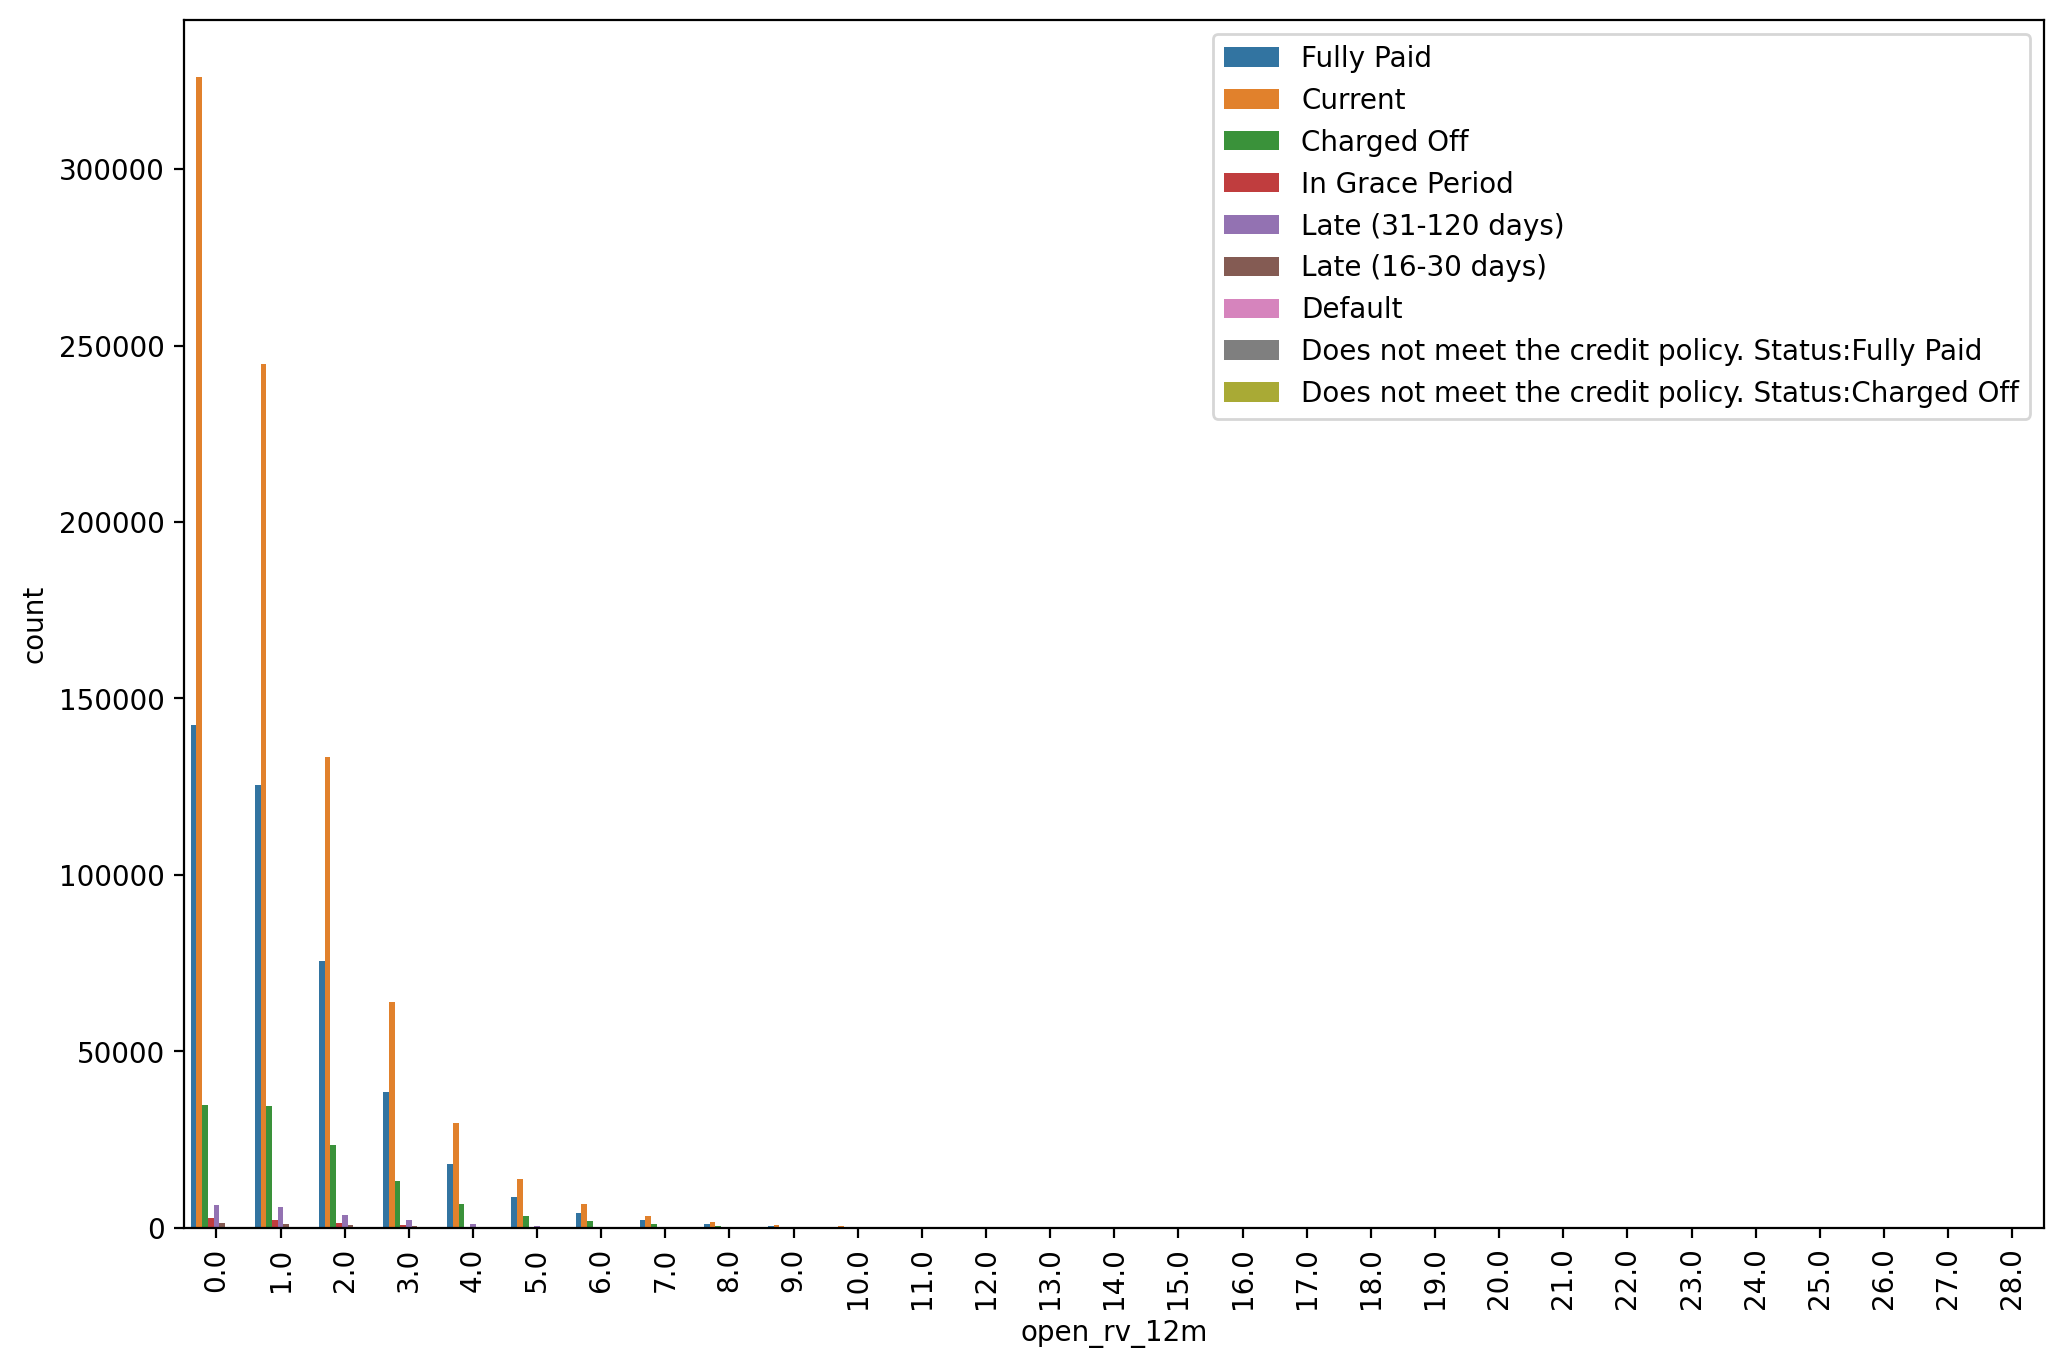

In [109]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='open_rv_12m', hue='loan_status')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
;

In [110]:
feat_info('open_rv_24m')

Number of revolving trades opened in past 24 months


In [111]:
feat_info('max_bal_bc')

Maximum current balance owed on all revolving accounts


In [112]:
feat_info('all_util')

Balance to credit limit on all trades


In [113]:
# No such feature in dict
# feat_info('total_rev_hi_lim')

In [114]:
feat_info('inq_fi')

Number of personal finance inquiries


In [115]:
feat_info('total_cu_tl')

Number of finance trades


In [116]:
feat_info('inq_last_12m')

Number of credit inquiries in past 12 months


In [117]:
feat_info('acc_open_past_24mths')

Number of trades opened in past 24 months.


In [118]:
feat_info('avg_cur_bal')

Average current balance of all accounts


''

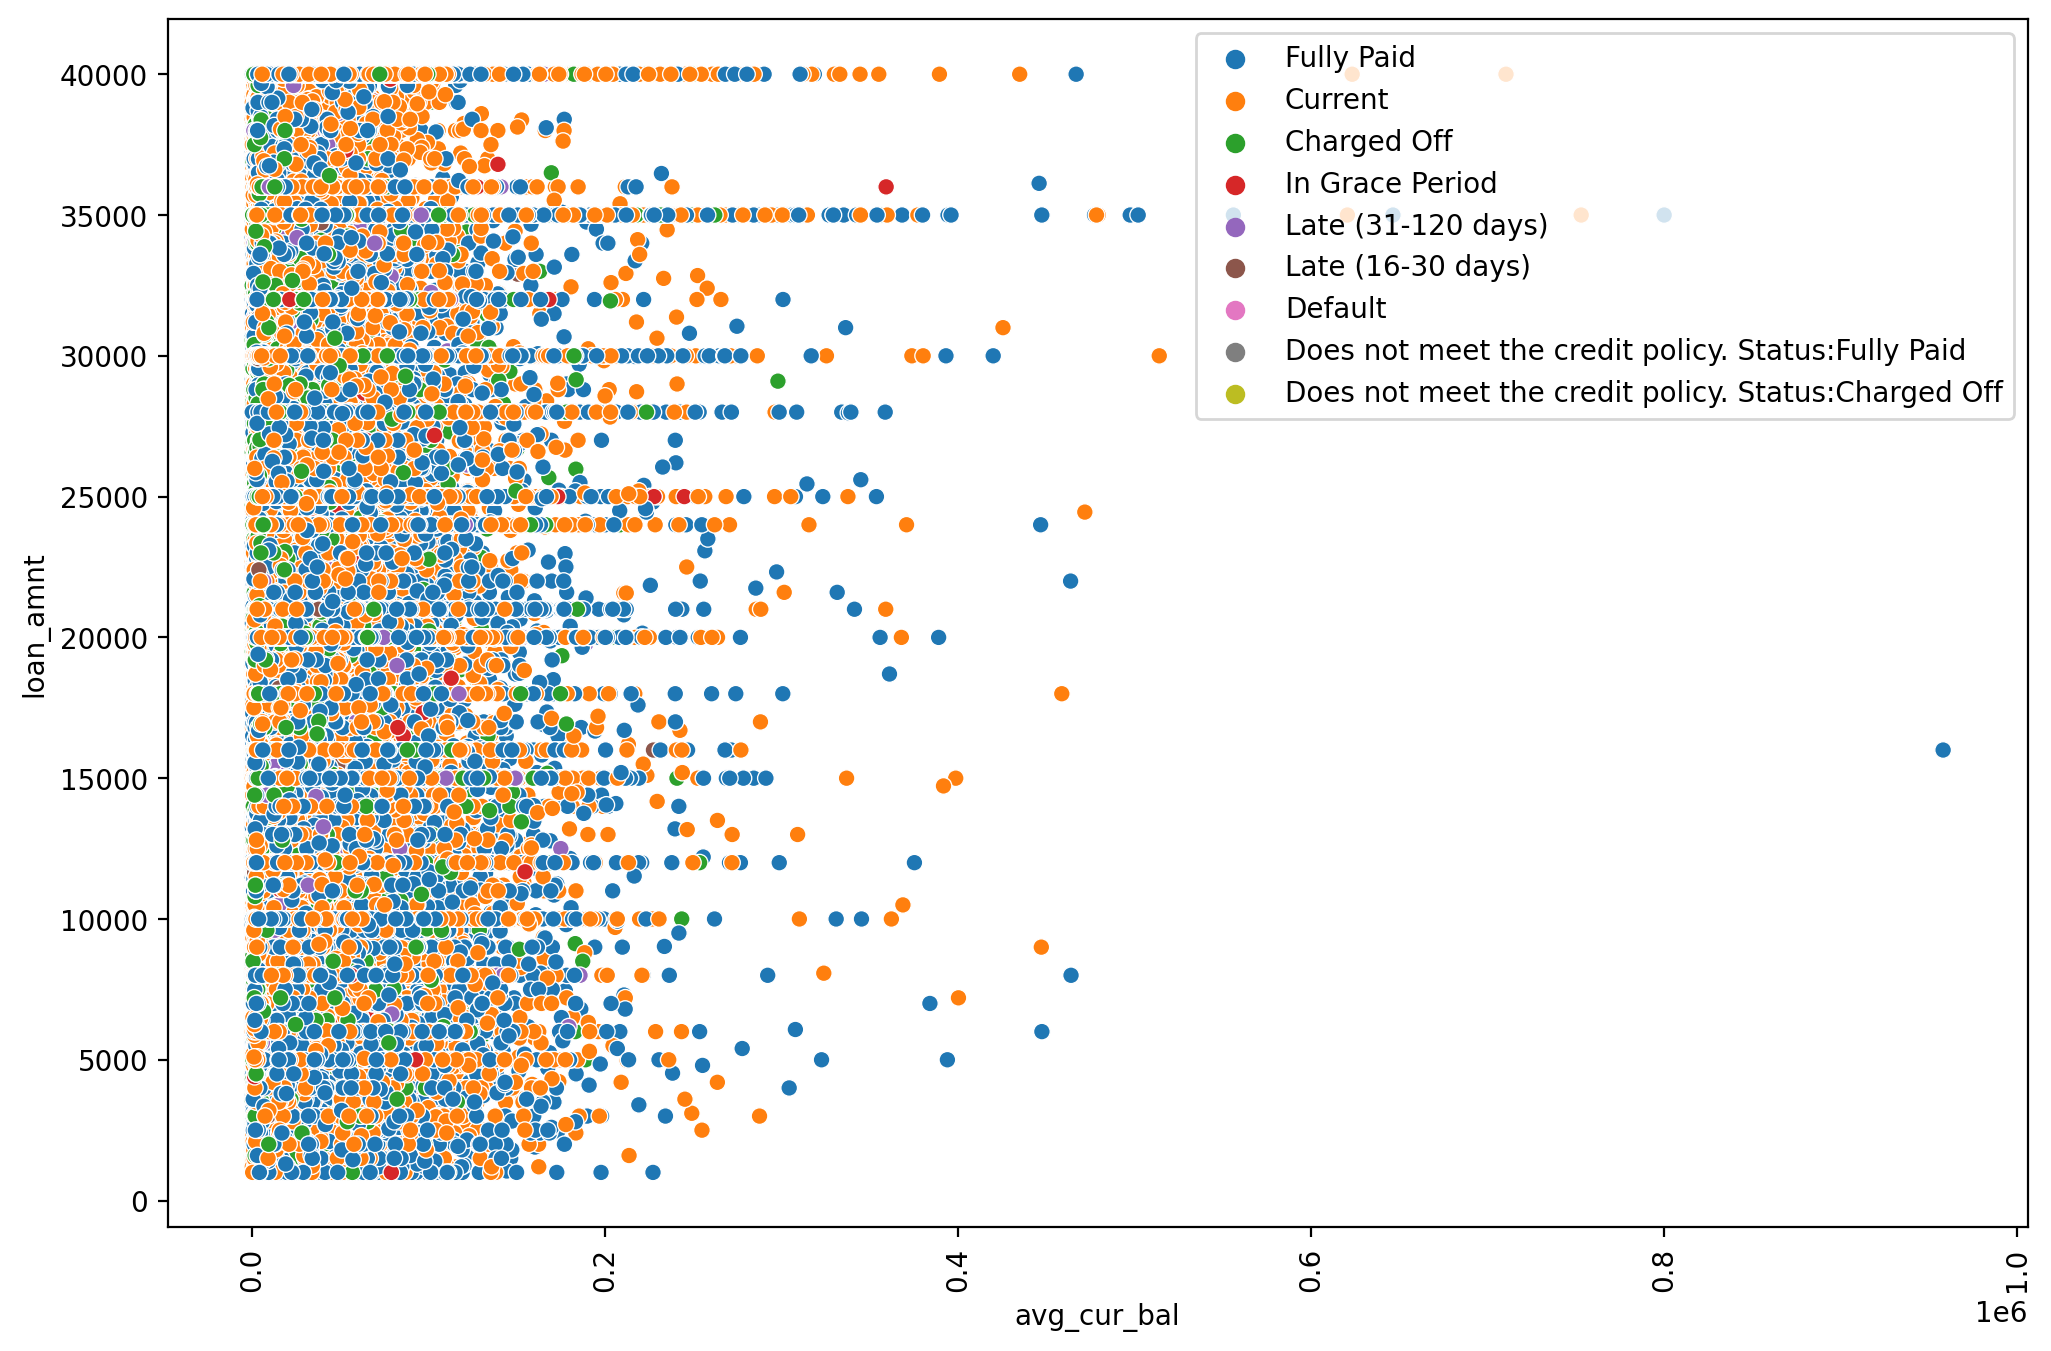

In [119]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='avg_cur_bal', y='loan_amnt', hue='loan_status')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
;

In [120]:
df.columns[80:100]

Index(['bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl'],
      dtype='object')

In [121]:
for i in ['bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl']:
    if not (i in feat_list):
        print(i)

bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl


In [122]:
feat_info('bc_open_to_buy')

Total open to buy on revolving bankcards.


In [123]:
feat_info('bc_util')

Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [124]:
feat_info('chargeoff_within_12_mths')

Number of charge-offs within 12 months


In [125]:
feat_info('delinq_amnt')

The past-due amount owed for the accounts on which the borrower is now delinquent.


In [126]:
feat_info('mo_sin_old_il_acct')

Months since oldest bank installment account opened


In [127]:
feat_info('mo_sin_old_rev_tl_op')

Months since oldest revolving account opened


In [128]:
feat_info('mo_sin_rcnt_rev_tl_op')

Months since most recent revolving account opened


In [129]:
feat_info('mo_sin_rcnt_tl')

Months since most recent account opened


In [130]:
feat_info('mths_since_recent_bc')

Months since most recent bankcard account opened.


In [131]:
feat_info('mths_since_recent_bc_dlq')

Months since most recent bankcard delinquency


In [132]:
feat_info('mths_since_recent_inq')

Months since most recent inquiry.


In [133]:
feat_info('mths_since_recent_revol_delinq')

Months since most recent revolving delinquency.


In [134]:
feat_info('num_accts_ever_120_pd')

Number of accounts ever 120 or more days past due


In [135]:
feat_info('num_actv_bc_tl')

Number of currently active bankcard accounts


In [136]:
feat_info('num_actv_rev_tl')

Number of currently active revolving trades


In [137]:
feat_info('num_bc_sats')

Number of satisfactory bankcard accounts


In [138]:
feat_info('num_bc_tl')

Number of bankcard accounts


In [139]:
feat_info('num_il_tl')

Number of installment accounts


In [140]:
feat_info('num_op_rev_tl')

Number of open revolving accounts


In [141]:
df.columns[100:120]

Index(['num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths'],
      dtype='object')

In [142]:
for i in ['num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths']:
    if not (i in feat_list):
        print(i)

num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tax_liens
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
revol_bal_joint
sec_app_fico_range_low
sec_app_fico_range_high
sec_app_earliest_cr_line
sec_app_inq_last_6mths


In [143]:
feat_info('num_rev_accts')

Number of revolving accounts


In [144]:
feat_info('num_rev_tl_bal_gt_0')

Number of revolving trades with balance >0


In [145]:
feat_info('num_sats')

Number of satisfactory accounts


In [146]:
feat_info('num_tl_120dpd_2m')

Number of accounts currently 120 days past due (updated in past 2 months)


In [147]:
feat_info('num_tl_30dpd')

Number of accounts currently 30 days past due (updated in past 2 months)


In [148]:
feat_info('num_tl_90g_dpd_24m')

Number of accounts 90 or more days past due in last 24 months


In [149]:
feat_info('num_tl_op_past_12m')

Number of accounts opened in past 12 months


In [150]:
feat_info('pct_tl_nvr_dlq')

Percent of trades never delinquent


In [151]:
feat_info('percent_bc_gt_75')

Percentage of all bankcard accounts > 75% of limit.


In [152]:
feat_info('tax_liens')

Number of tax liens


In [153]:
feat_info('tot_hi_cred_lim')

Total high credit/credit limit


In [154]:
feat_info('total_bal_ex_mort')

Total credit balance excluding mortgage


In [155]:
df['total_bal_ex_mort']

0           7746.0
1          39475.0
2          18696.0
3          52226.0
4          95768.0
            ...   
2260696    28398.0
2260697    62426.0
2260698    44215.0
2260699        NaN
2260700        NaN
Name: total_bal_ex_mort, Length: 2260701, dtype: float64

''

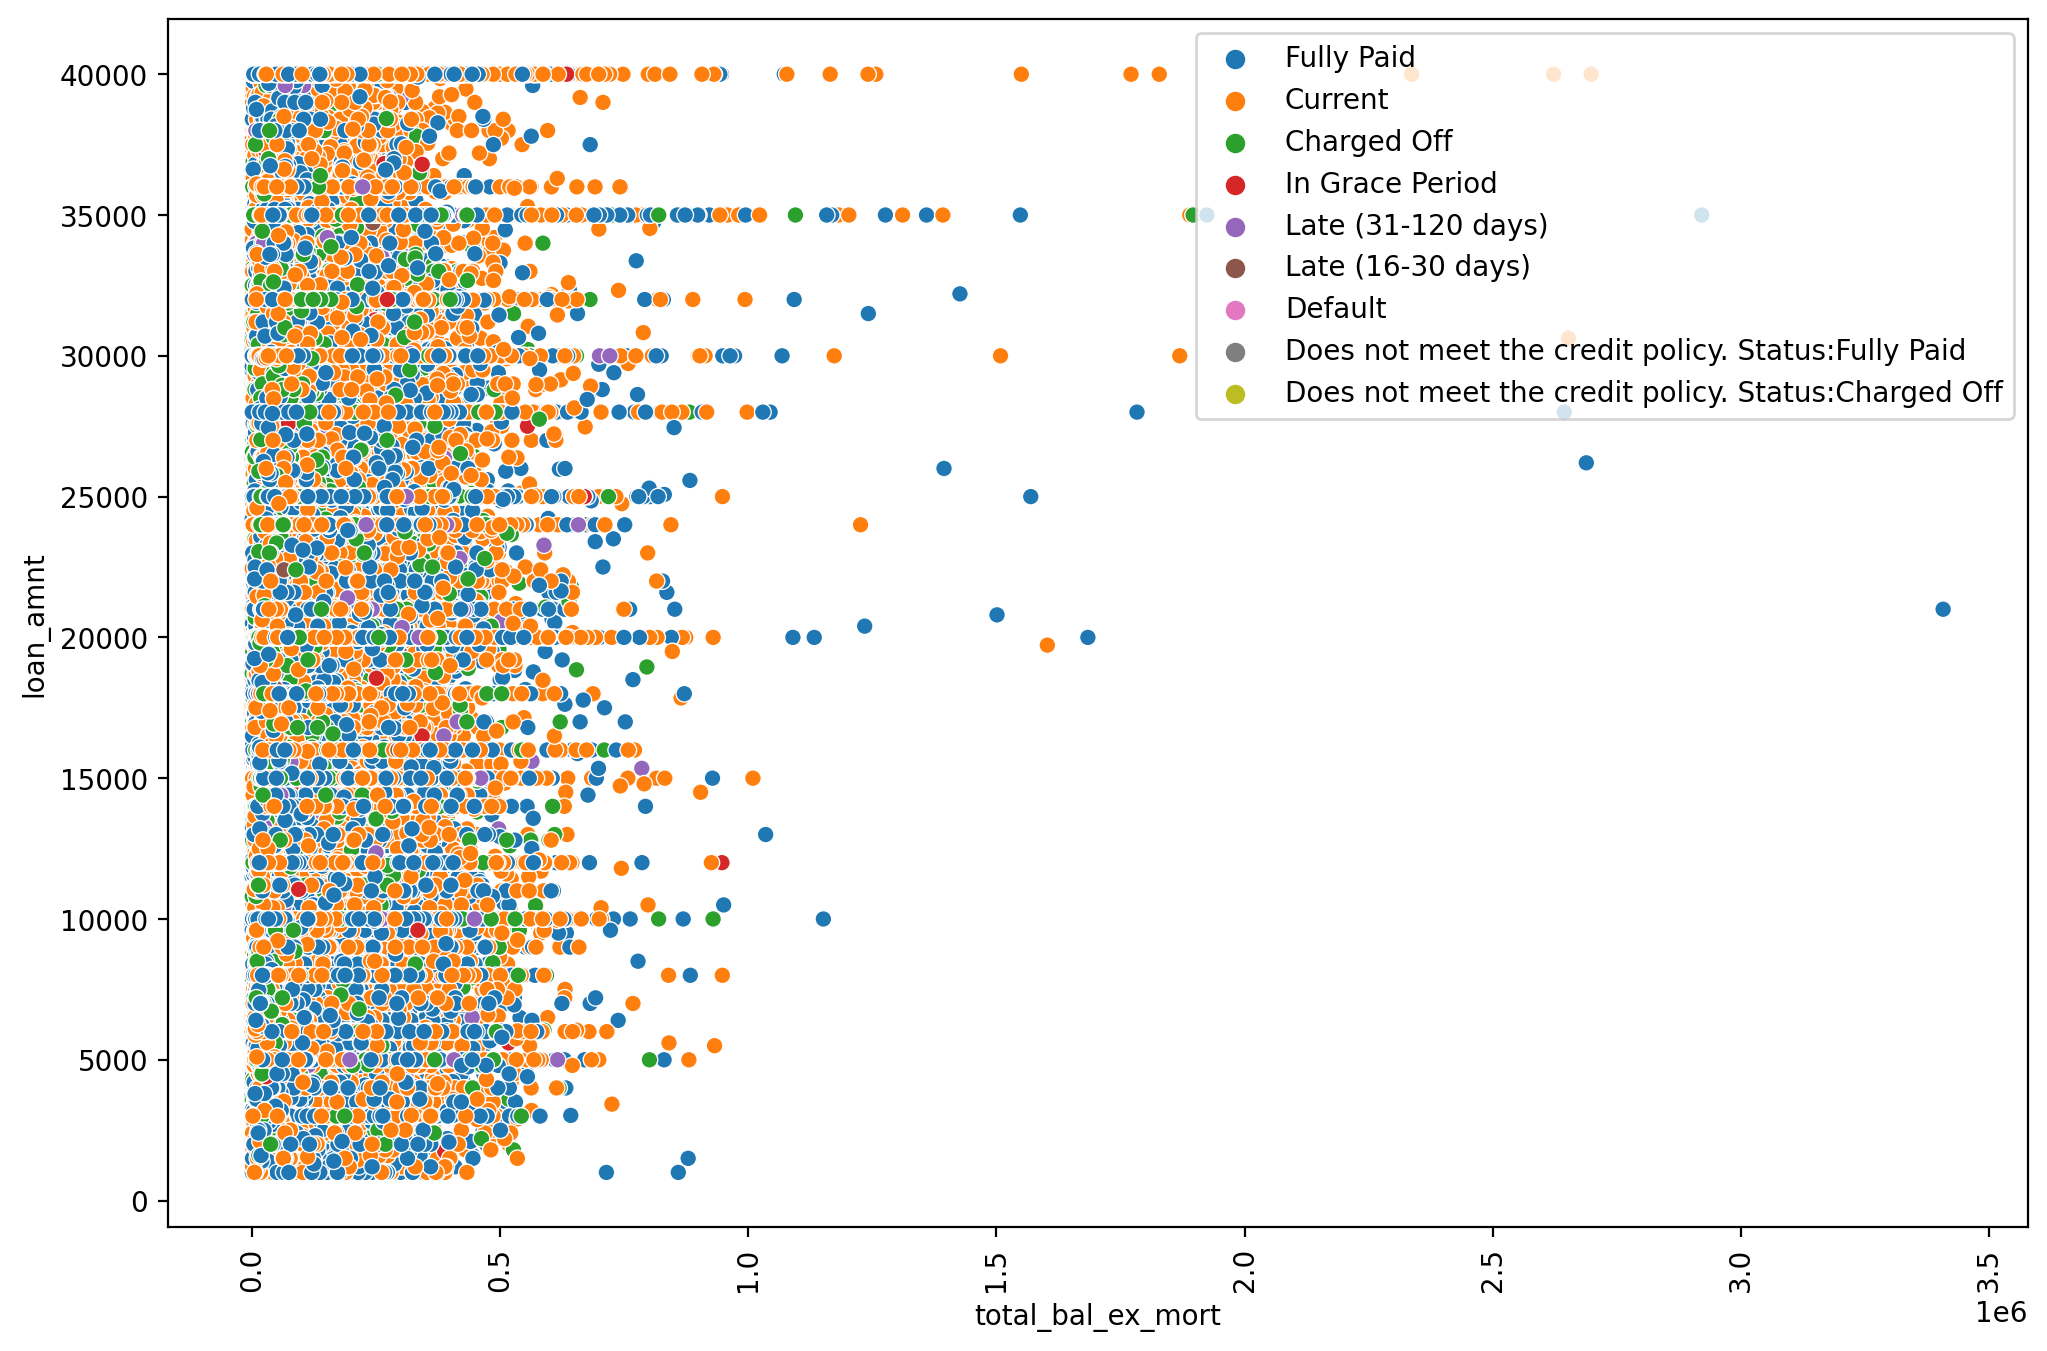

In [156]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='total_bal_ex_mort', y='loan_amnt', hue='loan_status')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
;

In [157]:
feat_info('total_bc_limit')

Total bankcard high credit/credit limit


In [158]:
feat_info('total_il_high_credit_limit')

Total installment high credit/credit limit


In [159]:
# feature does not exist in desc dataset
# feat_info('revol_bal_joint')

In [160]:
# feature does not exist in desc dataset
# feat_info('sec_app_fico_range_low')

In [161]:
# feature does not exist in desc dataset
# feat_info('sec_app_fico_range_high')

In [162]:
# feature does not exist in desc dataset
# feat_info('sec_app_earliest_cr_line')

In [163]:
# feature does not exist in desc dataset
# feat_info('sec_app_inq_last_6mths')

In [164]:
df.columns[120:140]

Index(['sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status'],
      dtype='object')

In [165]:
for i in ['sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status']:
    if not (i in feat_list):
        print(i)

sec_app_mort_acc
sec_app_open_acc
sec_app_revol_util
sec_app_open_act_il
sec_app_num_rev_accts
sec_app_chargeoff_within_12_mths
sec_app_collections_12_mths_ex_med
sec_app_mths_since_last_major_derog
hardship_flag
hardship_type
hardship_reason
hardship_status
deferral_term
hardship_amount
hardship_start_date
hardship_end_date
payment_plan_start_date
hardship_length
hardship_dpd
hardship_loan_status


In [166]:
# feature does not exist in desc dataset
# feat_info('sec_app_mort_acc')

In [167]:
# feature does not exist in desc dataset
# feat_info('sec_app_open_acc')

In [168]:
# feature does not exist in desc dataset
# feat_info('sec_app_revol_util')

In [169]:
feat_info('sec_app_open_act_il')

 Number of currently active installment trades at time of application for the secondary applicant


In [170]:
# feat_info('sec_app_num_rev_accts')

In [171]:
# feat_info('sec_app_chargeoff_within_12_mths')

In [172]:
# feat_info('sec_app_collections_12_mths_ex_med')

In [173]:
# feat_info('sec_app_mths_since_last_major_derog')

In [174]:
feat_info('hardship_flag')

Flags whether or not the borrower is on a hardship plan


In [175]:
df['hardship_flag'].value_counts()

N    2259836
Y        832
Name: hardship_flag, dtype: int64

In [176]:
feat_info('hardship_type')

Describes the hardship plan offering


In [177]:
df['hardship_type'].isnull().sum()

2249784

In [178]:
feat_info('hardship_reason')

Describes the reason the hardship plan was offered


In [179]:
df['hardship_reason'].isnull().sum()

2249784

In [180]:
feat_info('hardship_status')

Describes if the hardship plan is active, pending, canceled, completed, or broken


In [181]:
feat_info('deferral_term')

Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan


In [182]:
feat_info('hardship_amount')

The interest payment that the borrower has committed to make each month while they are on a hardship plan


In [183]:
feat_info('hardship_start_date')

The start date of the hardship plan period


In [184]:
feat_info('hardship_end_date')

The end date of the hardship plan period


In [185]:
feat_info('payment_plan_start_date')

The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments.


we will not include any of these hardship features since they affect a very small number of people

In [186]:
df.columns[140:]

Index(['orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object')

In [187]:
for i in ['orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term']:
    if not (i in feat_list):
        print(i)

orig_projected_additional_accrued_interest
hardship_payoff_balance_amount
hardship_last_payment_amount
disbursement_method
debt_settlement_flag
debt_settlement_flag_date
settlement_status
settlement_date
settlement_amount
settlement_percentage
settlement_term


In [188]:
feat_info('orig_projected_additional_accrued_interest')

The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.


In [189]:
feat_info('disbursement_method')

The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY


In [190]:
feat_info('debt_settlement_flag')

Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.


In [191]:
feat_info('settlement_status')

The status of the borrowers settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT


we will not include settlement features as they don't help us predict beforehand if a customer will charge off

This is the final feature set we have decided upon which we will bring into the next part for exploratory data analysis and data preprocessing

In [192]:
feat_list

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'funded_amnt_inv',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'total_pymnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'open_il_12m']